# Moviegoers' Segmentation : Business Intelligence & Data Analytics

## Segmentation Journey : 

- [1 Problem Statement](#1-Problem-statement)
- [2 Data Collection](#2-Data-Collection)
- [3 Data Checks To Perform](#3-Data-Checks-To-Perform)
- [4 Exploring Data ( Visualization )](#4-Exploring-Data-(-Visualization-))
- [5 Feature Reduction/Selection](#5-Feature-Reduction/Selection)
- [6 Data Preprocessing](#6-Data-Preprocessing)
- [7 Cluster Building](#7-Cluster-Building)
- [8 Cluster Description](#8-Cluster-Description)

### [1 Problem Statement](#1-Problem-statement)

- This project aims to understand how 180 respondents (University students of Milan,Italy) responds to a survey about Original Language Movies, KPI's can be detected and to segment/cluster the sample.  

- We also aim to discover if these responses are affected by variables such as Gender,Languages Spoken, Age and Average Monthly Spend. 

- Finally, we would like to conclude whether or not opening an Original Language Movie theatre is viable in Milan and if so, what are the pros and cons.


### [2 Data Collection](#2-Data-Collection)

- The original dataset consists of 75 columns and 180 rows.


###  2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib and Seaborn Library.

In [2888]:
import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import os

from factor_analyzer import FactorAnalyzer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch


%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


sns.set_palette("RdBu")
pd.set_option('display.max_columns', 100)

#### Import the Excel Data as Pandas DataFrame

In [2889]:

#def wrangle(filepath):
    
    #Reading the CSV File from local
    
    df1= pd.read_excel(filepath)
    
    ##Dropping Columns
    #Dropping V1
    #Dropping Q9_1 to Q9_6 since the response is either "NULL" or "Italian"
    #Dropping Q22 as it corresponds to education and since our respondents are university students it doesnt make sense
    
    df1.drop(columns=["V1",'Q9_1','Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6','ID'],inplace=True)
    
    #,"Q15_3","Q15_5","Q15_9","Q17_8","Q17_3","Q22"
    
    #Adding a new Column "Gender"
    
    mask_gend=[]

    for i in df1["Q18"]:
        if i==1:
            mask_gend.append("Male")
        else:
            mask_gend.append("Female")

    df1["Gender"]=mask_gend
    
    #Dropping Q18,Q15 & Q12 column
    
    df1.drop(columns=["Q18","Q15_1","Q15_6","Q15_4","Q15_8","Q12_1","Q12_3","Q12_8","Q15_7","Q15_2","Q12_9","Q12_10","Q12_2","Q12_4","Q12_5","Q12_6","Q12_7"],inplace=True)
    
    #Dropping Q12
    
    df1.drop(columns=["Q2_1","Q2_2","Q2_3","Q2_7","Q2_8","Q2_10","Q2_11","Q10_3","Q10_4","Q10_5","Q10_1","Q11_1","Q11_4","Q17_5","Q17_6","Q17_7","Q17_1"],inplace=True)
    
    
    return df1





In [2890]:
df1=wrangle("/Users/trotsqwerty/Desktop/Business Intelligence and Data Analytics/Exercise/exam_movie_segmentation.xlsx")

#### Show Top 5 Records

In [2891]:
df1.head(5)

,Q1,Q2_4,Q2_5,Q2_6,Q2_9,Q3,Q4,Q5,Q7,Q8,Q10_2,Q10_6,Q11_2,Q11_3,Q13,Q14,Q15_3,Q15_5,Q15_9,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_2,Q17_3,Q17_4,Q17_8,Q19,Q20,Q21,Q22,Q23,Gender
0,3,1,9,8,10,2.0,3,0,2,2,9,1,1,8,1,12,6,1,1,7,9,6,1,1,10,7,10,7,18,1,2,1,1,Male
1,5,4,8,8,8,7.0,3,3,3,1,9,1,2,9,1,6,4,6,5,8,10,7,1,4,8,8,8,8,21,1,3,1,2,Female
2,3,4,7,9,9,7.0,3,0,1,2,8,2,2,5,1,5,4,6,7,8,10,9,4,1,10,8,10,9,22,1,3,1,2,Female
3,2,2,9,9,9,8.0,1,1,0,2,8,6,5,7,1,12,7,7,7,9,10,4,1,6,9,7,9,6,19,1,1,1,1,Male
4,3,6,10,8,9,6.0,2,0,1,1,9,4,7,7,2,7,6,4,8,8,10,3,1,1,5,8,6,5,19,1,1,1,3,Male


In [2892]:
df1.columns

Index(['Q1', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_9', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8',
       'Q10_2', 'Q10_6', 'Q11_2', 'Q11_3', 'Q13', 'Q14', 'Q15_3', 'Q15_5',
       'Q15_9', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q17_2', 'Q17_3',
       'Q17_4', 'Q17_8', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Gender'],
      dtype='object')


#### Shape of the dataset


In [2893]:
df1.shape

(180, 34)

### 2.2 Dataset information

#### Columns are questionnaire responses which consist of a total of 23 questions divided as mentioned below :

- __Cinema Habits__ (Q1-Q6)

- __Original Language Movies__ (Q7-Q12)

- __Movie Theatre OV__ (Q13 & Q14) 

- __Preference of OV Cinema Offers__ (Q15)

- __Demographics and Personal Interests__ (Q16-Q23)

##### The questions are close ended and are of the following kind :

1. Numerical Responses

2. Rating on a Scale of 1-10 (where __1 = Not Important/Disagree/Do Not Like at all__ and  __10 = Very Important/Agree/Like A Lot__ )

3. Qualitative choice responses ( a,b,c,d,e,f,g) __Qualitative Choice responses are recorded as a=1,b=2,c=3.. so and so forth__



### [3 Data Checks To Perform](#3-Data-Checks-To-Perform)

- Check Missing values
- Check Duplicates
- Check data type
- Check statistics of data set
- Check and seperate quantitave and qualitative data

### 3.1 Check Missing values


In [2894]:
df1.isna().sum()

Q1        0
Q2_4      0
Q2_5      0
Q2_6      0
Q2_9      0
Q3        0
Q4        0
Q5        0
Q7        0
Q8        0
Q10_2     0
Q10_6     0
Q11_2     0
Q11_3     0
Q13       0
Q14       0
Q15_3     0
Q15_5     0
Q15_9     0
Q16_1     0
Q16_2     0
Q16_3     0
Q16_4     0
Q16_5     0
Q17_2     0
Q17_3     0
Q17_4     0
Q17_8     0
Q19       0
Q20       0
Q21       0
Q22       0
Q23       0
Gender    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [2895]:
df1.duplicated().sum()

0

#### There are no duplicate values in the data set

### 3.2 Check Datatypes


In [2896]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      180 non-null    int64  
 1   Q2_4    180 non-null    int64  
 2   Q2_5    180 non-null    int64  
 3   Q2_6    180 non-null    int64  
 4   Q2_9    180 non-null    int64  
 5   Q3      180 non-null    float64
 6   Q4      180 non-null    int64  
 7   Q5      180 non-null    int64  
 8   Q7      180 non-null    int64  
 9   Q8      180 non-null    int64  
 10  Q10_2   180 non-null    int64  
 11  Q10_6   180 non-null    int64  
 12  Q11_2   180 non-null    int64  
 13  Q11_3   180 non-null    int64  
 14  Q13     180 non-null    int64  
 15  Q14     180 non-null    int64  
 16  Q15_3   180 non-null    int64  
 17  Q15_5   180 non-null    int64  
 18  Q15_9   180 non-null    int64  
 19  Q16_1   180 non-null    int64  
 20  Q16_2   180 non-null    int64  
 21  Q16_3   180 non-null    int64  
 22  Q1

#### Each variable has 180 non-null values and are of the right Dtypes

### 3.3 Check the statistics of dataset

In [2897]:
df1.describe()

,Q1,Q2_4,Q2_5,Q2_6,Q2_9,Q3,Q4,Q5,Q7,Q8,Q10_2,Q10_6,Q11_2,Q11_3,Q13,Q14,Q15_3,Q15_5,Q15_9,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_2,Q17_3,Q17_4,Q17_8,Q19,Q20,Q21,Q22,Q23
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2.227778,4.644444,8.272222,7.944444,8.733333,7.685000,1.966667,1.083333,2.394444,1.744444,8.000000,2.883333,4.744444,7.122222,1.250000,8.511111,6.050000,4.977778,6.333333,7.472222,8.938889,3.961111,1.800000,3.133333,7.994444,7.477778,8.144444,7.161111,21.716667,1.416667,2.005556,1.316667,2.188889
std,1.945717,2.662846,1.863590,1.802302,1.288540,2.151275,0.797342,1.872694,4.815591,0.437390,1.934688,2.387760,2.576478,2.367507,0.434221,2.799619,2.220461,2.189246,1.946204,1.507636,2.289553,2.670685,1.652491,2.679114,1.635832,1.779635,1.648165,2.148571,2.096219,0.932798,0.822160,0.466474,1.222640
min,0.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,7.000000,7.000000,8.000000,6.375000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,2.000000,6.000000,1.000000,7.000000,4.000000,3.000000,5.000000,7.000000,9.000000,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,6.000000,20.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,4.000000,9.000000,8.000000,9.000000,8.000000,2.000000,0.000000,1.000000,2.000000,8.000000,2.000000,5.000000,8.000000,1.000000,8.000000,6.000000,5.000000,6.000000,8.000000,10.000000,4.000000,1.000000,2.000000,8.000000,8.000000,8.000000,7.500000,21.000000,1.000000,2.000000,1.000000,2.000000
75%,3.000000,7.000000,10.000000,9.000000,10.000000,8.000000,3.000000,1.000000,2.000000,2.000000,10.000000,4.000000,7.000000,9.000000,1.250000,10.000000,8.000000,6.250000,8.000000,8.000000,10.000000,6.000000,1.250000,5.000000,9.000000,9.000000,9.000000,9.000000,23.000000,1.000000,3.000000,2.000000,3.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,3.000000,12.000000,30.000000,2.000000,10.000000,10.000000,10.000000,10.000000,2.000000,20.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,30.000000,7.000000,3.000000,2.000000,5.000000


### 3.4 Exploring Data

In [2898]:
# Defining Numerical & Categorical columns

df_quant= df1.drop(['Q8','Q13','Gender', 'Q19', 'Q20', 'Q21', 'Q23','Q4',"Q17_8","Q17_3","Q22"],axis=1)
df_qual = df1[['Q8','Q13','Gender', 'Q19', 'Q20', 'Q21', 'Q23','Q4',"Q17_8","Q17_3","Q22"]]

print('We have {} quantitative/numerical features'.format(len(df_quant.columns)))
print('We have {} qualitative/categorical features'.format(len(df_qual.columns)))

We have 23 quantitative/numerical features
We have 11 qualitative/categorical features


In [2862]:
df_qual.head()

,Q8,Q13,Gender,Q19,Q20,Q21,Q23,Q4,Q17_8,Q17_3
0,2,1,Male,18,1,2,1,3,7,7
1,1,1,Female,21,1,3,2,3,8,8
2,2,1,Female,22,1,3,2,3,9,8
3,2,1,Male,19,1,1,1,1,6,7
4,1,2,Male,19,1,1,3,2,5,8


In [2863]:
df_quant.head()

,Q1,Q2_4,Q2_5,Q2_6,Q2_9,Q3,Q5,Q7,Q10_2,Q10_6,Q11_2,Q11_3,Q14,Q15_3,Q15_5,Q15_9,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_2,Q17_4
0,3,1,9,8,10,2.0,0,2,9,1,1,8,12,6,1,1,7,9,6,1,1,10,10
1,5,4,8,8,8,7.0,3,3,9,1,2,9,6,4,6,5,8,10,7,1,4,8,8
2,3,4,7,9,9,7.0,0,1,8,2,2,5,5,4,6,7,8,10,9,4,1,10,10
3,2,2,9,9,9,8.0,1,0,8,6,5,7,12,7,7,7,9,10,4,1,6,9,9
4,3,6,10,8,9,6.0,0,1,9,4,7,7,7,6,4,8,8,10,3,1,1,5,6


<AxesSubplot:>

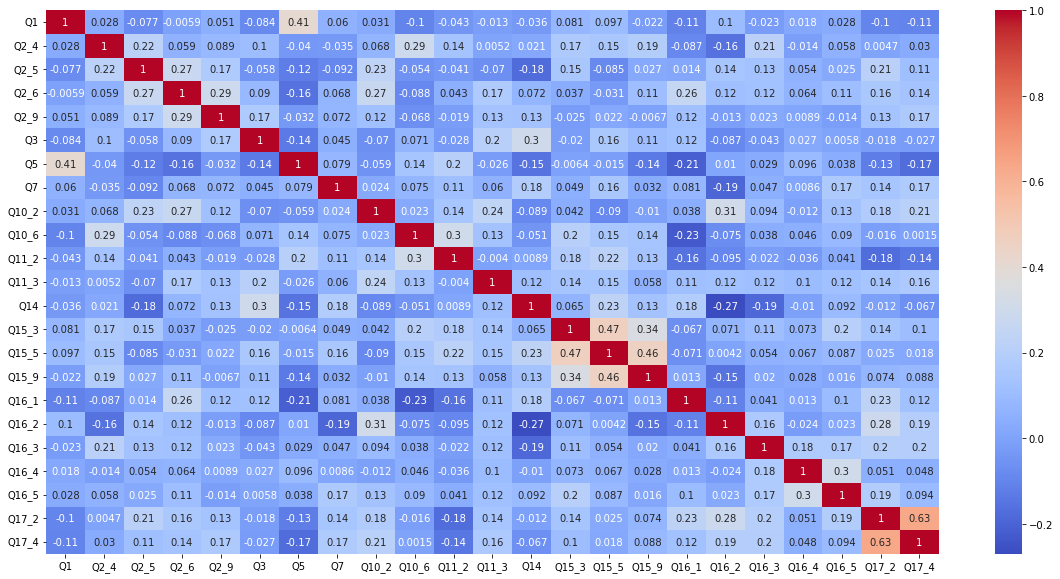

In [2744]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_quant.corr(),cmap='coolwarm',annot=True)

### [4 Exploring Data ( Visualization )](#4-Exploring-Data-(-Visualization-))


### 4.1 Sample Population & Goodness of Data
- To check the distribution of sample population
- To check if it is random,consistent and representative 
- To check if it is representative of the target population


#### 4.1.1 Q18 : Gender

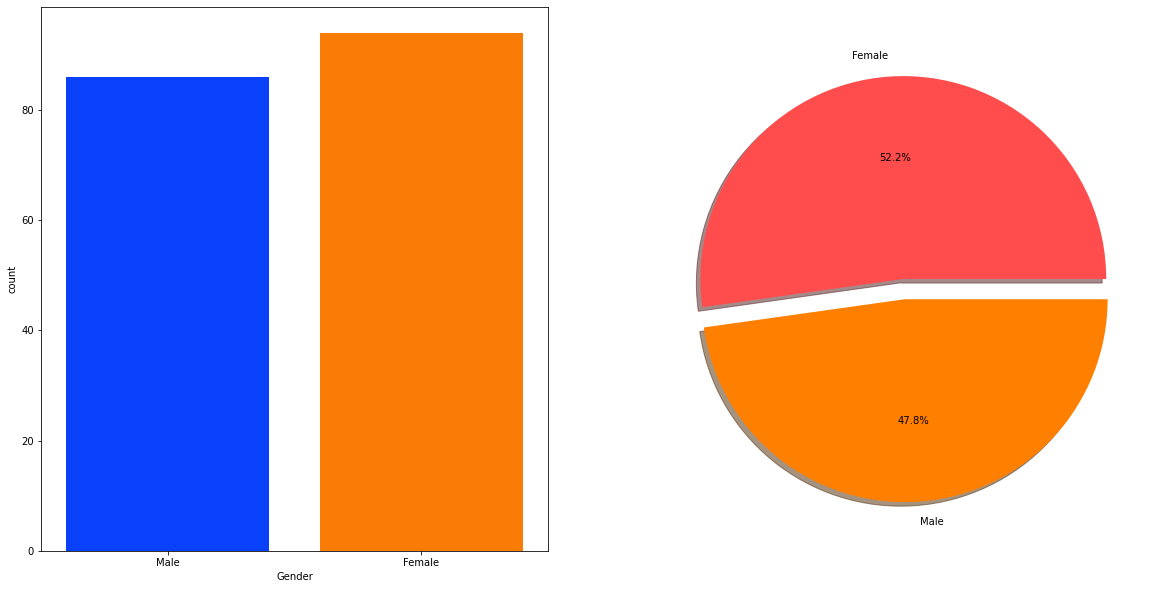

In [2745]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df1['Gender'],data=df1,palette ='bright',ax=ax[0],saturation=0.95)

plt.pie(x=df1['Gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- The data is balanced gender wise as there are __94 (52.2%) Female respondents__ and __86 (47.8%) Male respondents__.  

####  4.1.2 Q19 : Age Column
- To check the distribution of age range across the respondents

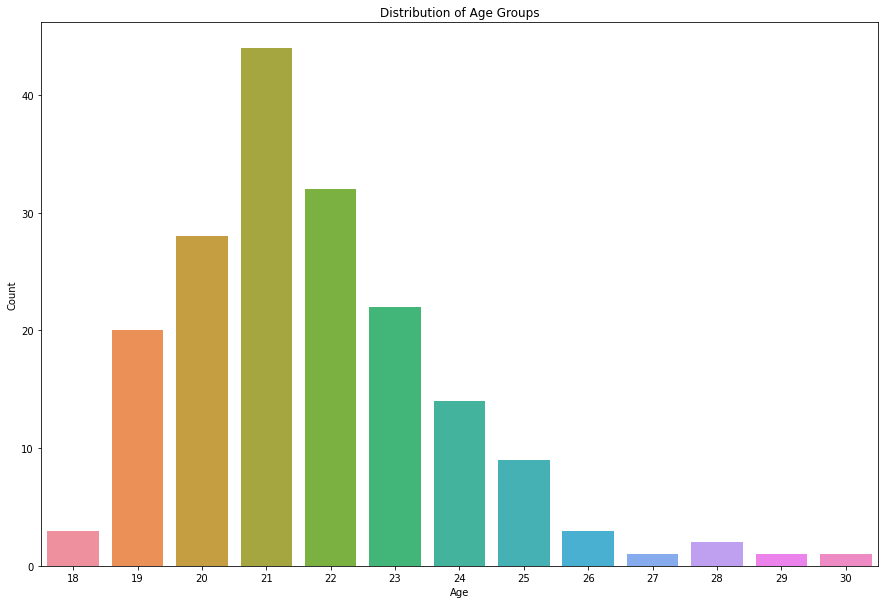

In [2746]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q19'],data=df1,saturation=0.85)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.show()

#### Insights 
- The distribution of ages amongst the respondents is not consistent and it has a right skew.
-  __146(81%)__ of the respondents belong to the age range of __19-23 Years__
- The largest amount, __44 respondents(24%)__ are 21 years old

####  Bivariate Analysis: Age Vs Gender Distribution
- To check the distribution of age and gender across the respondents

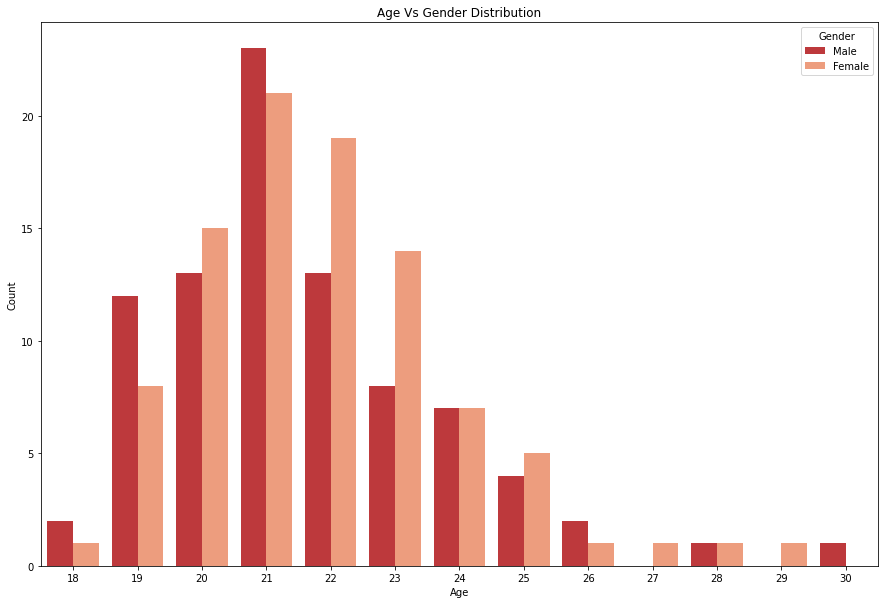

In [2747]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q19'],data=df1,hue="Gender",saturation=0.95)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Vs Gender Distribution")
plt.show()

In [2748]:
ct=pd.crosstab(index=df1["Q19"], columns=df1["Gender"], rownames=["AGE"], colnames=["GENDER"],normalize='columns',margins=True, margins_name="TOTAL").style.format('{:.2%}')
ct

GENDER,Female,Male,TOTAL
AGE,,,
18,1.06%,2.33%,1.67%
19,8.51%,13.95%,11.11%
20,15.96%,15.12%,15.56%
21,22.34%,26.74%,24.44%
22,20.21%,15.12%,17.78%
23,14.89%,9.30%,12.22%
24,7.45%,8.14%,7.78%
25,5.32%,4.65%,5.00%
26,1.06%,2.33%,1.67%


#### Insights 
- The distribution of age across the respondents isn't consistent but there is an equal gender split amongst the age groups.

####  4.1.3 Q20 : Origin Column
- To check the distribution of Origin across the respondents
- The responses are recorded in numbers and this is what each number translates to:

    __1= Italy, 2=Europe , 3=Asia , 4=North America , 5=South America , 6=Africa , 7=Oceania__

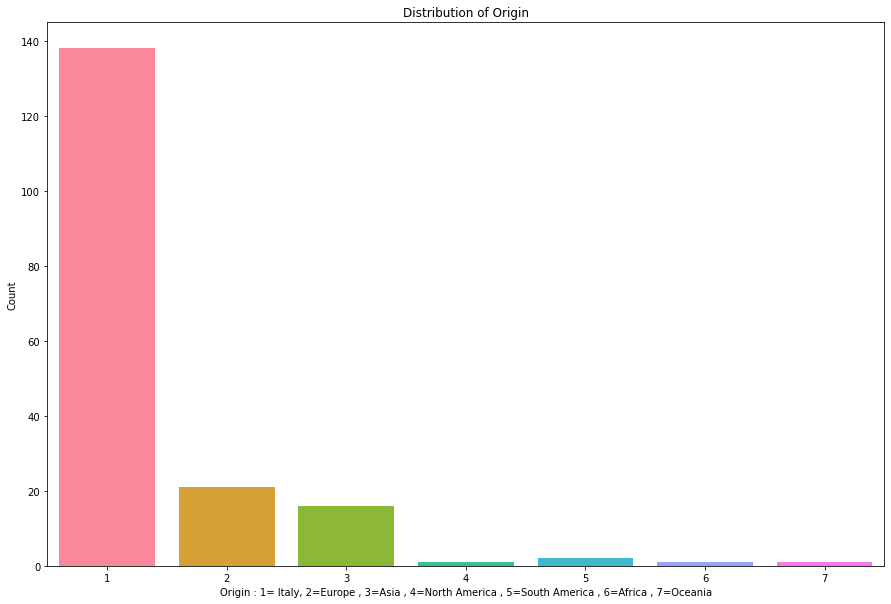

In [2749]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q20'],data=df1,saturation=1.5)
plt.xlabel("Origin : 1= Italy, 2=Europe , 3=Asia , 4=North America , 5=South America , 6=Africa , 7=Oceania")
plt.ylabel("Count")
plt.title("Distribution of Origin")
plt.show()

#### Insights 
- The majority of the respondents are from Italy __(138 respondents)__ which makes up __76% of the sample__
- The next most significant place of origin is Europe __(21 respondents)__

####  4.1.4 Q23 : Average Monthly Spend
- To check the distribution of average monthly spend across the respondents
- The respondents were asked about their average monthly spend and the responses were in ranges. 
- The ranges are as follows :
    __1= Below 250€, 2= 250€ - 500€ , 3= 500€ - 750€ , 4= 750€ - 900€ , 5= Above 900€__

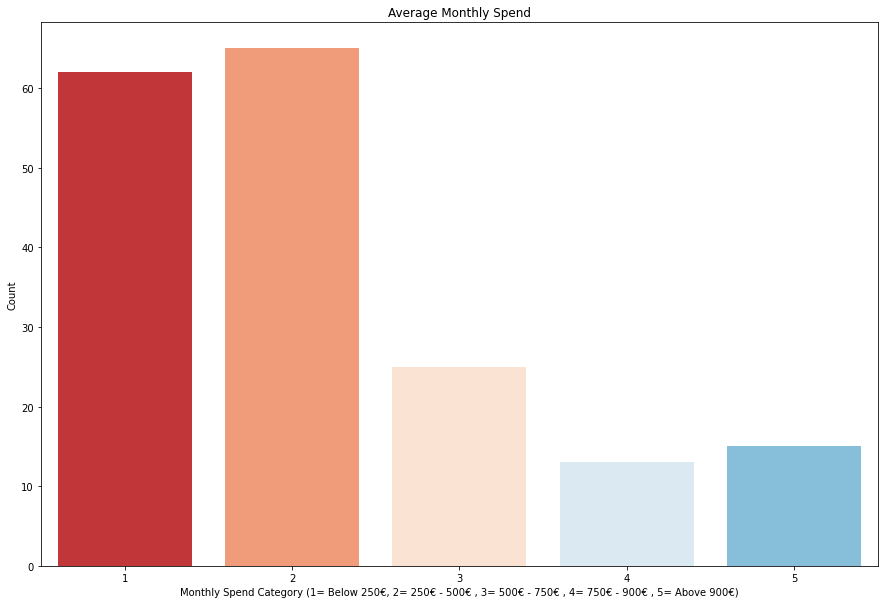

In [2750]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q23'],data=df1,saturation=1.5)
plt.xlabel("Monthly Spend Category (1= Below 250€, 2= 250€ - 500€ , 3= 500€ - 750€ , 4= 750€ - 900€ , 5= Above 900€)")
plt.ylabel("Count")
plt.title("Average Monthly Spend")
plt.show()

#### Insights 
- The majority of the respondents belong __128(70.56%)__ to the first 2 categories of monthly spending.
- This tells us that the majority of our sample population spends less than __500 Euros per month__ for everything excluding rent

### Conclusions about Goodness of data

- Since the survey was conducted at universities in Milan, we notice that the sample data will not be accurately representative of the target population i.e entire movie going population of Milan.

- The gender distribution is almost balanced eventhough there are more __Female respondents(52.2%)__ than __Male respondents(47.8%)__. This is representative of the target population.

- The sample is highly concentrated with younger respondents belonging to the age range of __19-23 Years__ as they make up __81%__ of the entire sample population. This isn't representative of the entire movie going target population of Milan. This has to be kept in mind when analyzing data as well as these could lead to some biases.

- The origin data shows us that the respondents were __76% Italians__ which is representative of the target population which has __81.1% Italians with 18.9% Foriegners.__

- The average monthly spend data tells us that the majority __(127 Respondents,70.56%)__ of the sample population spends less than __500 Euros__ per month for every activity excluding rent

### 4.2  Movie Going Habits : Univariate & Bivariate Analysis

- To analyse the features that indicate the movie going habits of respondents
- To perform univariate and bivariate analysis wherever necessary


### 4.2.1 Univariate Analysis -  Q1 : Frequency of Cinema Visits in the past three months

In [2751]:
df1["Q1"].describe()

count    180.000000
mean       2.227778
std        1.945717
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Q1, dtype: float64

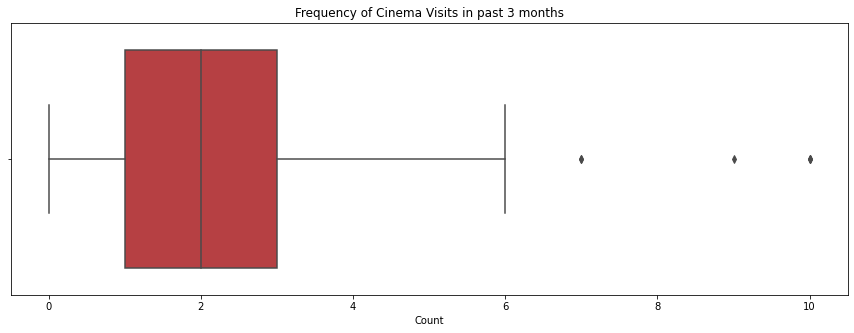

In [2752]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df1['Q1'],data=df1,saturation=0.85)
plt.xlabel("Count")
plt.title("Frequency of Cinema Visits in past 3 months")
plt.show()

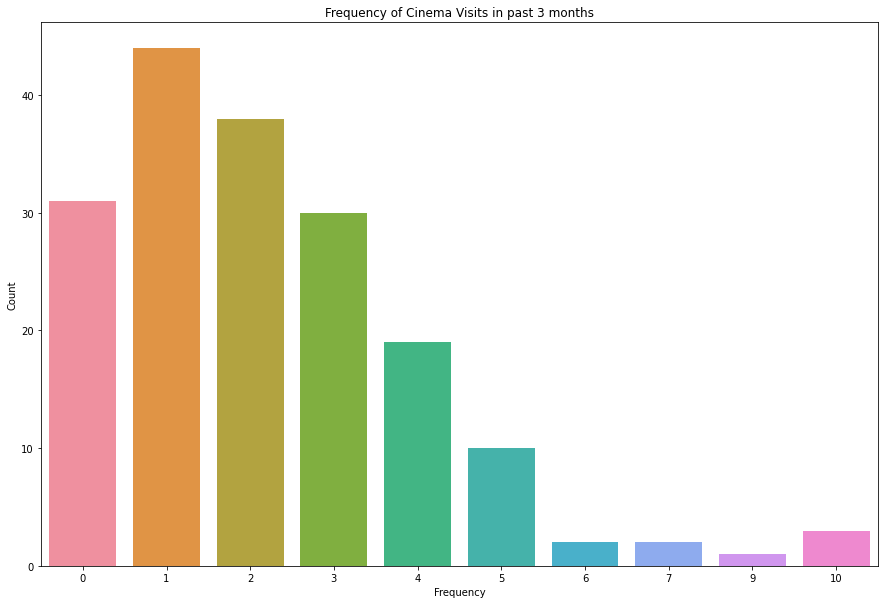

In [2753]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q1'],data=df1,saturation=0.85)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Frequency of Cinema Visits in past 3 months")
plt.show()

#### Insights 

- In this section of analysis, we explore the general movie going habits of our sample population.  As a starting point, we analyzed the frequencies at which our respondents have gone to the cinema in the past three months.
- The average is at __2.2 times__ with a standard deviation of __1.95__
- The majority of the respondents i.e __131(72.7%)__ visited the cinema 1-4 times in the past three months.
- Most of the respondents __149(83%)__ have gone to the cinema atleast once in three months
-  Only __10% (18 respondents)__ have gone to the cinema 5 times or above.

### 4.2.2 Univariate Analysis -  Q3 : Average Spend per ticket

In [2754]:
df1["Q3"].describe()

count    180.000000
mean       7.685000
std        2.151275
min        2.000000
25%        6.375000
50%        8.000000
75%        8.000000
max       20.000000
Name: Q3, dtype: float64

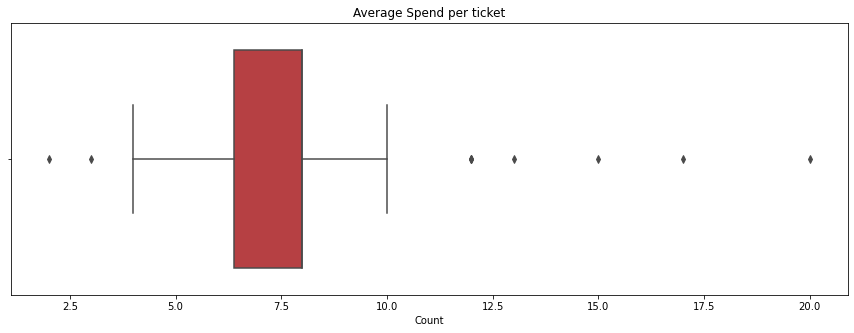

In [2755]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df1['Q3'],data=df1,saturation=0.85)
plt.xlabel("Count")
plt.title("Average Spend per ticket")
plt.show()

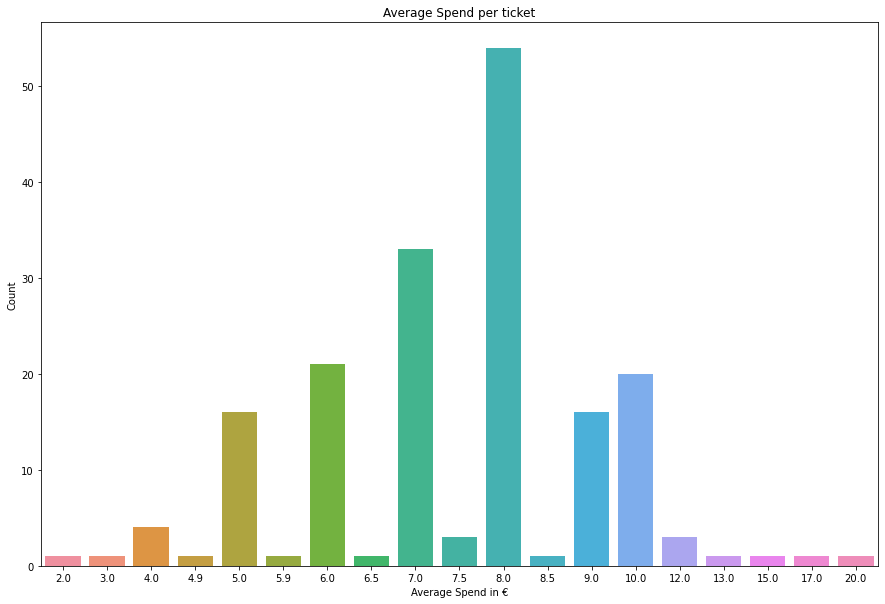

In [2756]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q3'],data=df1,saturation=0.85)
plt.xlabel("Average Spend in €")
plt.ylabel("Count")
plt.title("Average Spend per ticket")
plt.show()

#### Insights 

- In this section of analysis, we analyzed the average spend per ticket by respondents.
- The average is at __7.6€ __ with a standard deviation of __2.15__
- The majority of the respondents i.e __112(62.2%)__ spent between 6-8 Euros per ticket.
- There were __43(23.8%)__ respondents who spent more than 9€ per ticket. 

### 4.2.3 Bivariate Analysis -  Q1 vs Q3 : Visits vs Average Spend
- To analyse the two variables to see if there's any relationship through correlation and visualization

In [2757]:
r, p = stats.pearsonr(df1["Q3"], df1["Q1"])
corr1={ 
"Pearson's Correlation":r,
"P Value":p}

corr1

{"Pearson's Correlation": -0.08366326576803068, 'P Value': 0.2641656344298965}

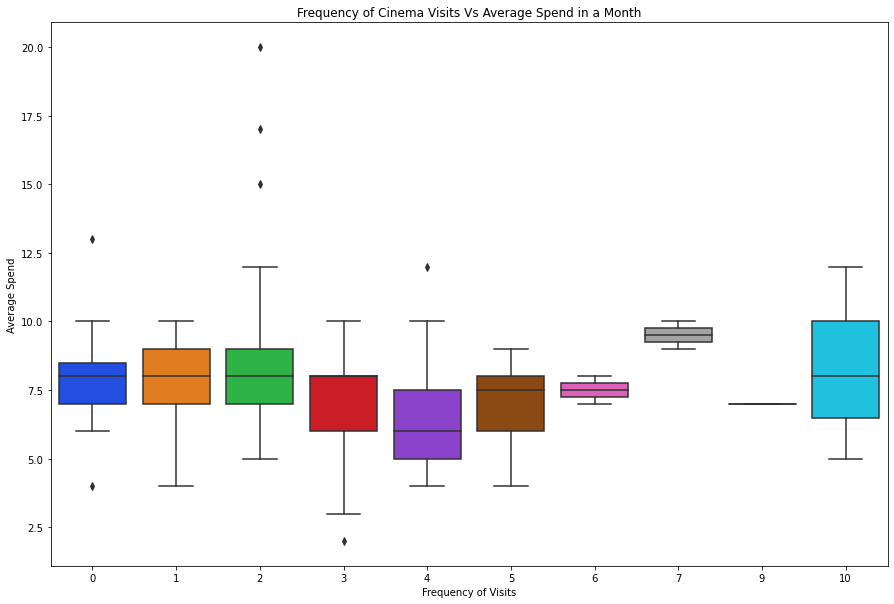

In [2758]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Q1',data=df1,y="Q3", palette="bright")
plt.xlabel("Frequency of Visits")
plt.ylabel("Average Spend")
plt.title("Frequency of Cinema Visits Vs Average Spend in a Month")
plt.show()

In [2759]:
#Age Vs Average Spend
r, p = scipy.stats.pearsonr(df1["Q3"], df1["Q19"])
corrage={ "Pearson's Correlation":r,"P Value":p}

corrage

{"Pearson's Correlation": -0.07602125511298712, 'P Value': 0.31044192579272306}

#### Insights 
- The Pearson's Correlation and P-Value tells us that there is __no significant negative or positive correlation between the frequency of visits and the average spend and the p value has no statistical significance(0.264)__.
- The Pearson's Correlation and P-Value was also analysed for Age vs Average Spend per ticket and __no significant negative or positive correlation between age and the average spend and the p value has no statistical significance (0.31)__.


### 4.2.4 Univariate Analysis -  Q2_1 to Q2_11 : Important factors when going to the Cinema
- To analyse different factors that can lead to choice of a cinema

In [2760]:
df_why= df1[["Q2_5","Q2_6","Q2_4","Q2_9"]]
df_why.describe()

,Q2_5,Q2_6,Q2_4,Q2_9
count,180.000000,180.000000,180.000000,180.000000
mean,8.272222,7.944444,4.644444,8.733333
std,1.863590,1.802302,2.662846,1.288540
min,1.000000,1.000000,1.000000,4.000000
25%,7.000000,7.000000,3.000000,8.000000
50%,9.000000,8.000000,4.000000,9.000000
75%,10.000000,9.000000,7.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000


- To pick the most important factors, we considered the factors with the highest/lowest means which also had the lowest standard deviation
- We have identified four important factors amongst these which are :__Q2_4- Snacks , Q2_5 - Price , Q2_6 - Timetable , Q2_9 - Choice__


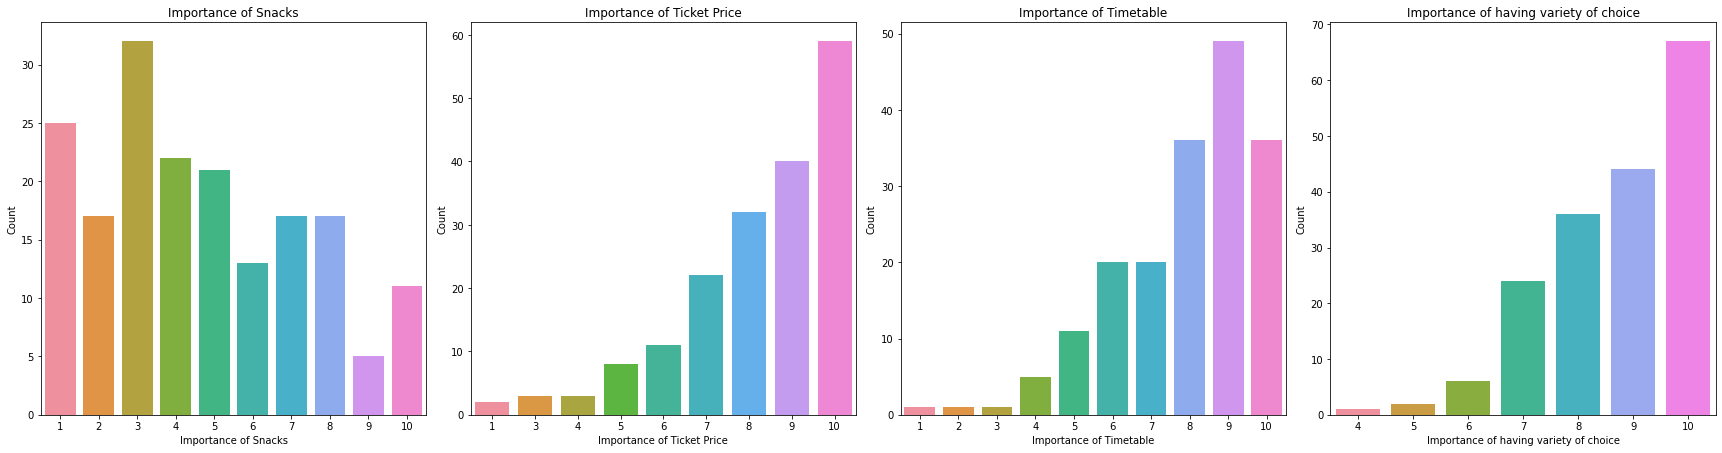

In [2761]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(2,5,1)
sns.countplot(x=df1['Q2_4'],data=df1,saturation=0.85)
plt.xlabel("Importance of Snacks")
plt.ylabel("Count")
plt.title("Importance of Snacks")

plt.subplot(2,5,2)
sns.countplot(x=df1['Q2_5'],data=df1,saturation=0.85)
plt.xlabel("Importance of Ticket Price")
plt.ylabel("Count")
plt.title("Importance of Ticket Price")

plt.subplot(2,5,3)
sns.countplot(x=df1['Q2_6'],data=df1,saturation=0.85)
plt.xlabel("Importance of Timetable")
plt.ylabel("Count")
plt.title("Importance of Timetable")

plt.subplot(2,5,4)
sns.countplot(x=df1['Q2_9'],data=df1,saturation=0.85)
plt.xlabel("Importance of having variety of choice")
plt.ylabel("Count")
plt.title("Importance of having variety of choice")

plt.tight_layout()


plt.show()


In [2762]:
fvalue, pvalue = stats.f_oneway(df_why['Q2_4'], df_why['Q2_5'], df_why['Q2_6'], df_why['Q2_6'])
print(fvalue, pvalue)

123.64016897011554 1.5761999997706148e-64


#### Insights 
- The analysis helps us understand that the ticket price,a good timetable and variety of choice were the most important factors for the respondents when going to the cinema
- The analysis also showed that snack offers wasn't as important as the three factors mentioned above.


### 4.2.5 Bivariate Analysis -  Q3 vs Q2_9 : Average Spend vs Variety of Choice
- To analyse the two variables to see if there's any relationship through correlation and visualization

In [2763]:
r, p = scipy.stats.pearsonr(df1["Q3"], df1["Q2_9"])
corr1={ "Pearson's Correlation":r,"P Value":p}
corr1

{"Pearson's Correlation": 0.17307928717866056, 'P Value': 0.0201529297837791}

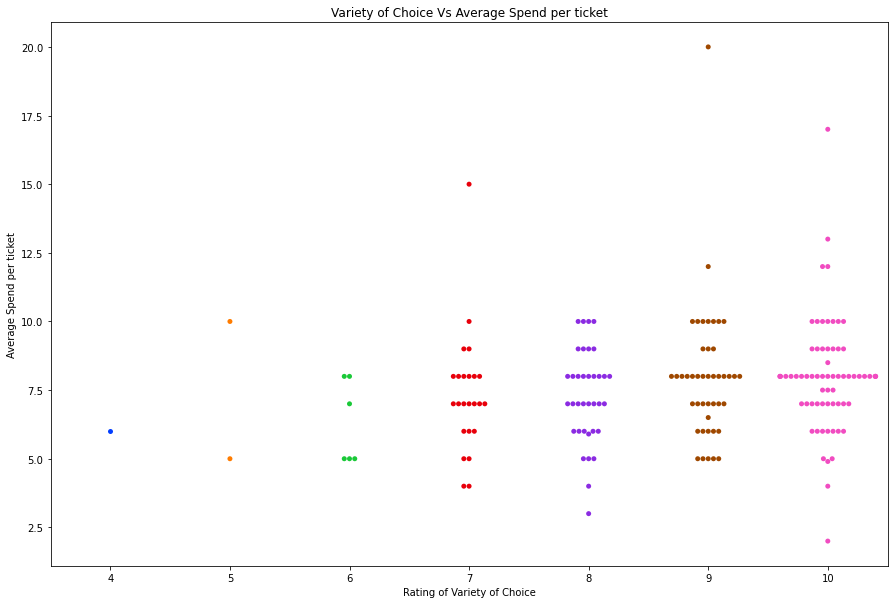

In [2764]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x='Q2_9',data=df1,y="Q3", palette="bright")
plt.xlabel("Rating of Variety of Choice")
plt.ylabel("Average Spend per ticket")
plt.title("Variety of Choice Vs Average Spend per ticket")
plt.show()

#### Insights 
- The analysis shows that the P Value is significant __0.02__ and these two factors are very slightly positively correlated at __0.173__
- The analysis shows that the respondents place importance for the variety of choice and are slightly more willing to pay for that choice

### 4.2.5 Bivariate Analysis -  Q19 vs Q2_9 : Age vs Variety of Choice
- To analyse the two variables to see if there's any relationship through correlation and visualization

In [2765]:
r, p = scipy.stats.pearsonr(df1["Q19"], df1["Q2_9"])
corr1={ "Pearson's Correlation":r,"P Value":p}
corr1

{"Pearson's Correlation": -0.23495828369930535,
 'P Value': 0.0014988770525579396}

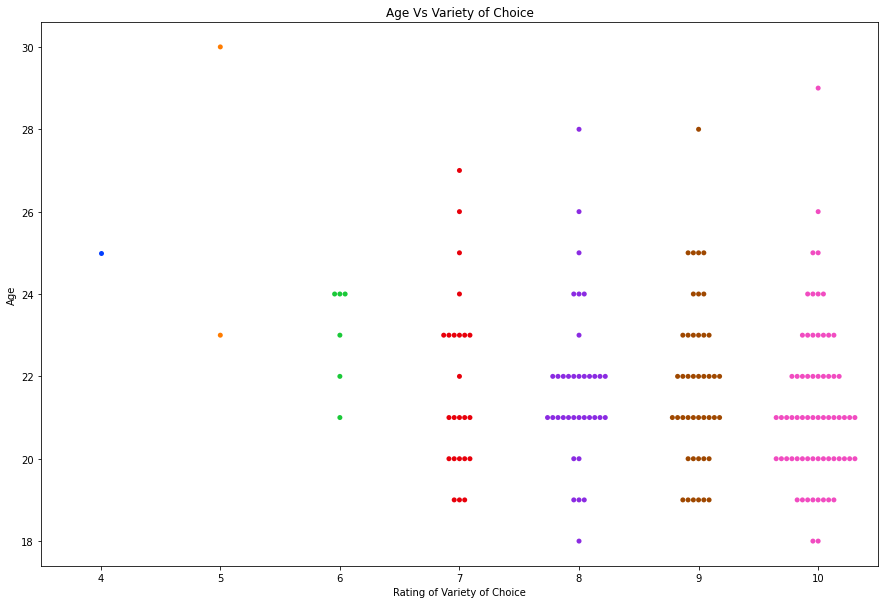

In [2766]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x='Q2_9',data=df1,y="Q19", palette="bright")
plt.xlabel("Rating of Variety of Choice")
plt.ylabel("Age")
plt.title("Age Vs Variety of Choice")
plt.show()

#### Insights 
- The analysis shows that the P Value is statistically significant __0.0014__ and these two factors are weakly negatively correlated at __-0.234__
- The analysis shows that as the age of the respondents decreases the demand/ rating for the cinemas to have more variety increases.
- This shows that younger people are looking for and are open to the idea of having cinemas which have a wider variety of movies playing

### 4.3  Original Language Movies : Univariate & Bivariate Analysis

- To analyse the features that indicate the openness and the previous experience with original language movies of the respondents
- To perform univariate and bivariate analysis on important factors

### 4.3.1 Univariate Analysis -  Q7 : Frequency of watching Movies in their original language in cinema in the past year


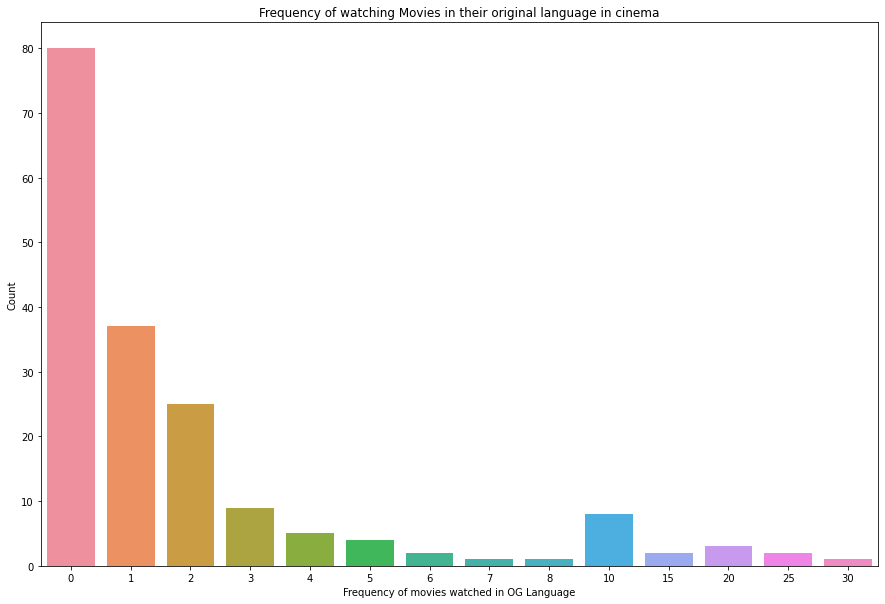

In [2767]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q7'],data=df1,saturation=0.85)
plt.xlabel("Frequency of movies watched in OG Language")
plt.ylabel("Count")
plt.title("Frequency of watching Movies in their original language in cinema")
plt.show()

#### Insights 
-  The majority of the respondents i.e __100(55.5%)__ saw atleast 1 original language movie in a theatre in the past year.
- Whereas __80(44.5%) respondents__ did not watch any original language movies in a theatre in the past year
-  The sample population is almost equally split in this regard.

### 4.3.2 Univariate Analysis -  Q8 : Watched a movie in it's original language in Milan  &  Q13: Would you go to a cinema which only played original language movies in Milan
- The respondents had to answer "Yes" or "No" and it was transcribed as follows :
  __1= Yes, 2= No__

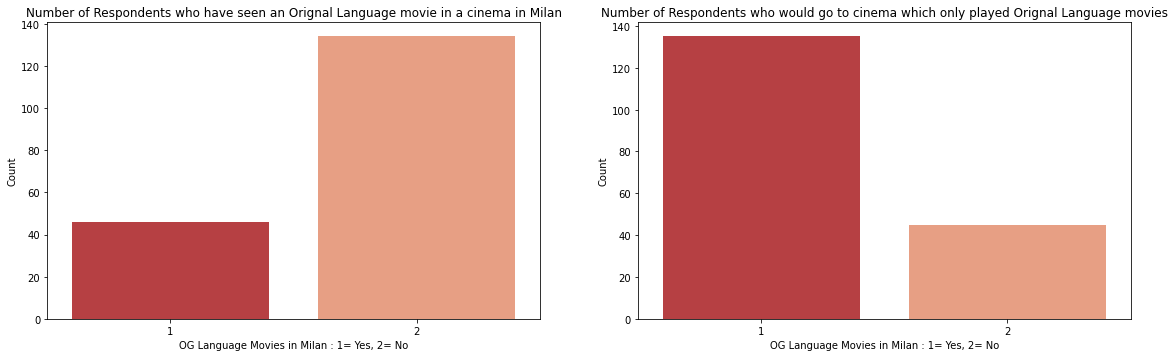

<Figure size 2160x864 with 0 Axes>

In [2768]:
plt.subplot(2,3,1)
sns.countplot(x=df1['Q8'],data=df1,saturation=0.85)
plt.xlabel("OG Language Movies in Milan : 1= Yes, 2= No")
plt.ylabel("Count")
plt.title("Number of Respondents who have seen an Orignal Language movie in a cinema in Milan")


plt.subplot(2,3,2)
sns.countplot(x=df1['Q13'],data=df1,saturation=0.85)
plt.xlabel("OG Language Movies in Milan : 1= Yes, 2= No")
plt.ylabel("Count")
plt.title("Number of Respondents who would go to cinema which only played Orignal Language movies")
plt.show()

plt.tight_layout()
plt.show()


#### Insights 
-  __In Q8__: The majority of the respondents i.e __134(74.5%)__ did not see an original language movie in a theatre in Milan.
-  Whereas __46(25.5%) respondents__ did watch original language movies in a theatre in Milan

- __In Q13__: The majority of the respondents i.e __135(75%)__ would likely visit a cinema that played only oringal language movies

-  This analysis shows that eventhough people do watch original language movies, there seems to be a disparity in the amount of people going to watch original language movies in the cinemas located in Milan.

- This would indicate that there is a demand for original language movies but not many cinemas play them or even if they do they fail to reach the right targets.

### 4.3.3 Univariate Analysis -  Q14 : Willing to spend for an Original Language Movie
- The respondents had to give an amount they would be willing to spend to watch an original language movie in a cinema in Milan

In [2769]:
df1["Q14"].describe()

count    180.000000
mean       8.511111
std        2.799619
min        3.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       20.000000
Name: Q14, dtype: float64

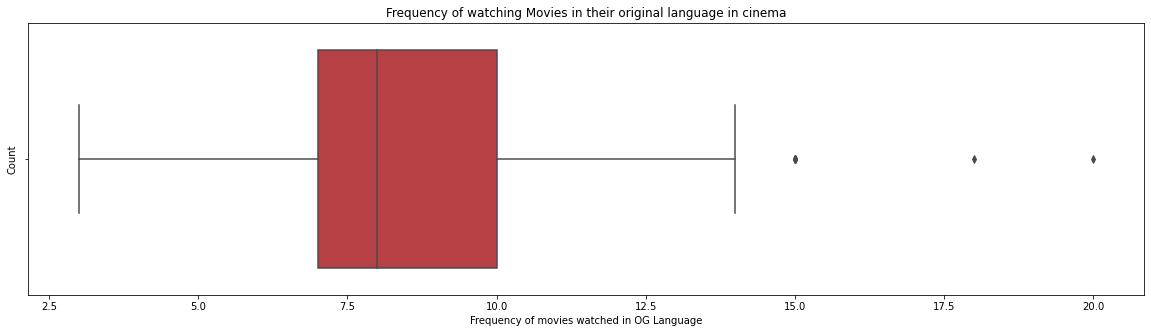

In [2770]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df1['Q14'],data=df1,saturation=0.85,orient="h")
plt.xlabel("Frequency of movies watched in OG Language")
plt.ylabel("Count")
plt.title("Frequency of watching Movies in their original language in cinema")
plt.show()

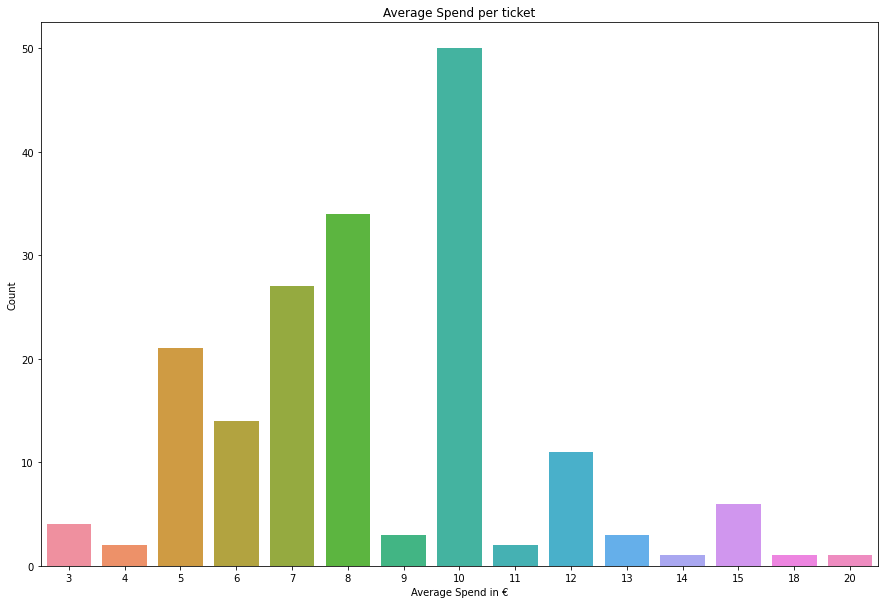

In [2771]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q14'],data=df1,saturation=0.85)
plt.xlabel("Average Spend in €")
plt.ylabel("Count")
plt.title("Average Spend per ticket")
plt.show()

#### Insights 
-  The respondents are willing to spend on average __8.5€__  with a standard deviation of __2.7__ to watch an original language movie in a theatre in Milan.

-  This average is higher than what the respondents spend usually on a ticket which is __7.6€__ 

- This shows that there is a positive response to watch original language movies and the respondents on average are willing to spend a little more than what they spend to watch it.

### 4.3.4 Bivariate Analysis -  Q14 vs Q21 : Willing to spend for an Original Language Movie vs University
- The analysis between willingness to spend and the university the respondents attend
- We do an ANOVA test to check the statistical significance

In [2772]:
anov(df1["Q14"],df1["Q21"])

               sum_sq     df         F    PR(>F)
y           59.028561    1.0  7.818066  0.005741
Residual  1343.949217  178.0       NaN       NaN


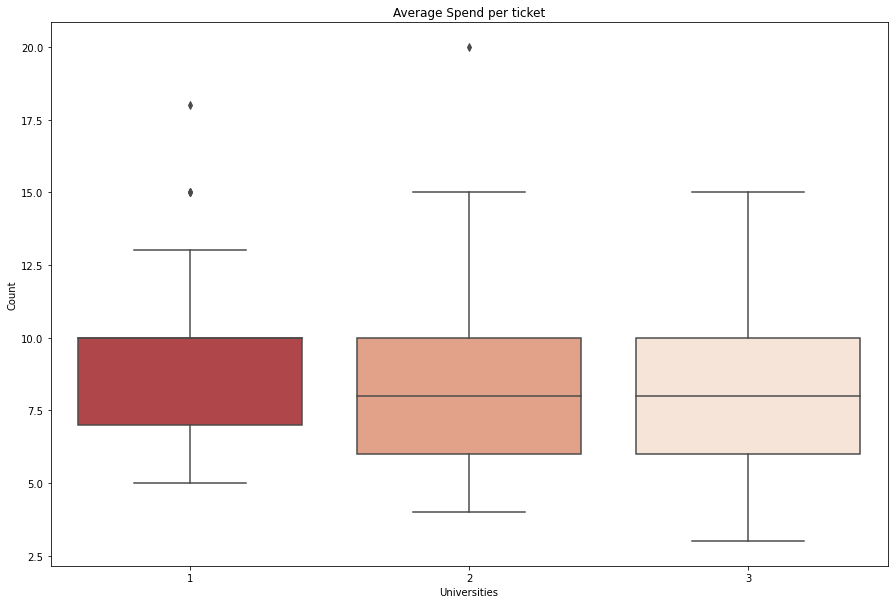

In [2773]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=df1['Q21'],data=df1,y=df1["Q14"])
plt.xlabel("Universities")
plt.ylabel("Count")
plt.title("Average Spend per ticket")
plt.show()

#### Insights 
- The test result suggests the groups have the same sample means in this case, since the __p-value>0.05__



### 4.3.5 Univariate Analysis -  Q10 : What are the factors that would motivate the respondents to choose the original language movies over a dubbed one

- To pick the most important factors, we considered the factors with the highest/lowest means which also had the lowest standard deviation

- We have identified two important factors amongst these which are : Q10_2- Improve Language knowledge & Q10_6 - Follow a trend

In [2774]:
df_1= df1[["Q10_2","Q10_6"]]
df_1.describe()

,Q10_2,Q10_6
count,180.000000,180.000000
mean,8.000000,2.883333
std,1.934688,2.387760
min,2.000000,1.000000
25%,7.000000,1.000000
50%,8.000000,2.000000
75%,10.000000,4.000000
max,10.000000,10.000000


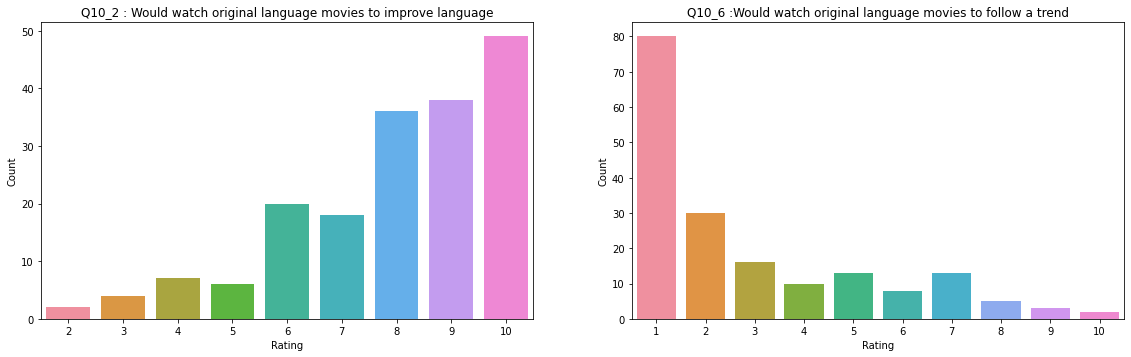

<Figure size 2160x864 with 0 Axes>

In [2775]:
plt.subplot(2,3,1)
sns.countplot(x=df1['Q10_2'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q10_2 : Would watch original language movies to improve language")


plt.subplot(2,3,2)
sns.countplot(x=df1['Q10_6'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q10_6 :Would watch original language movies to follow a trend")
plt.show()

plt.tight_layout()
plt.show()


#### Insights 
-  The majority of respondents __161(89.4%)__ rated above 5 for "Would watch original language movies to improve language knowledge". The average was at __8__ with a standard deviation of __1.93__.

-  The majority of respondents __161(89.4%)__ rated below 5 for "Would watch original language movies to follow a trend".The average was at __2.8__ with a standard deviation of __2.38__.

- This shows that the respondents would rather watch original language movies for self improvement or out of self interest than follow a general trend or hype.

### 4.3.6 Univariate Analysis -  Q11 : What are the factors that would prevent a respondent from watching a movie in its original language?

- To pick the most important factors, we considered the factors with the highest/lowest means which also had the lowest standard deviation

- We have identified two important factors amongst these which are : __Q11_2- Limited Language Knowledge__ & __Q11_3 - Hard to find cinemas offering original language movies__

In [2776]:
df_1= df1[["Q11_2","Q11_3"]]
df_1.describe()

,Q11_2,Q11_3
count,180.000000,180.000000
mean,4.744444,7.122222
std,2.576478,2.367507
min,1.000000,1.000000
25%,2.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,9.000000
max,10.000000,10.000000


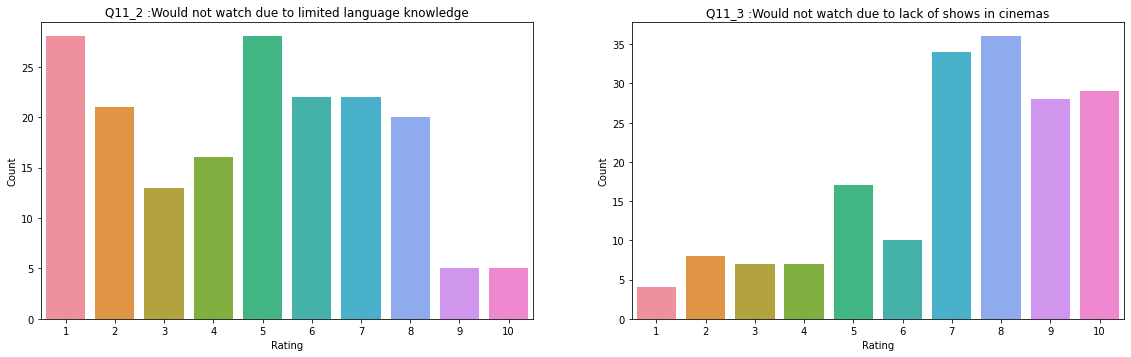

<Figure size 2160x864 with 0 Axes>

In [2777]:
plt.subplot(2,3,1)
sns.countplot(x=df1['Q11_2'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q11_2 :Would not watch due to limited language knowledge")


plt.subplot(2,3,2)
sns.countplot(x=df1['Q11_3'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q11_3 :Would not watch due to lack of shows in cinemas")
plt.show()

plt.tight_layout()
plt.show()


#### Insights 
-  The majority of respondents __106(58%)__ rated below 5 for "Would not watch due to limited language knowledge". The average was at __4.74__ with a standard deviation of __2.5__.

-  The majority of respondents __137(76%)__ rated above 5 for "Would not watch due to lack of shows in cinemas".The average was at __7.1__ with a standard deviation of __2.36__.

- This shows that the respondents would watch original language movies if the cinemas offered to show them and most of them would not be demotivated due to the lack of knowledge of the language the movie is in. 

### 4.4  Personality Traits : Univariate & Bivariate Analysis

- To analyse the features that indicate the personality and the languages the respondents speak
- To perform univariate and bivariate analysis on important factors

### 4.4.1  Univariate Analysis : Q17 - How would you describe yourself?
- The respondents were asked to rate themselves on a scale of 1-10 based on a few describing words in the questionnaire

- We have identified two of the words where the majority of the respondents related to and those are : __Q17_2 - Curious & Q17_4 - Open Minded__

In [2778]:
df_1= df1[["Q17_2","Q17_4"]]
df_1.describe()

,Q17_2,Q17_4
count,180.000000,180.000000
mean,7.994444,8.144444
std,1.635832,1.648165
min,2.000000,2.000000
25%,7.000000,7.000000
50%,8.000000,8.000000
75%,9.000000,9.000000
max,10.000000,10.000000


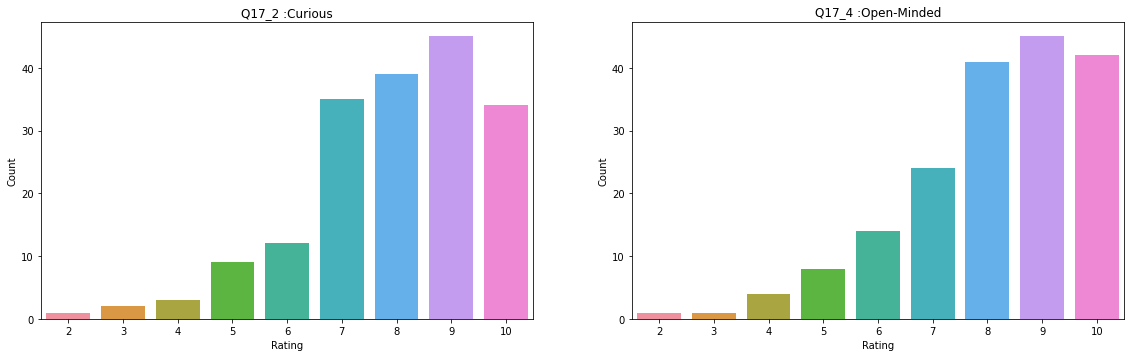

<Figure size 2160x864 with 0 Axes>

In [2779]:
plt.subplot(2,3,1)
sns.countplot(x=df1['Q17_2'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q17_2 :Curious")


plt.subplot(2,3,2)
sns.countplot(x=df1['Q17_4'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q17_4 :Open-Minded")
plt.show()

plt.tight_layout()
plt.show()


#### Insights 
-  The majority of respondents __165(91.6%)__ rated above 5 for  describing themselves as "Curious". The average was at __7.99__ with a standard deviation of __1.63__.

-  The majority of respondents __166(92.2%)__ rated above 5 for  describing themselves as "Open-Minded".The average was at __8.14__ with a standard deviation of __1.64__.

### 4.4.2  Univariate Analysis : Q16 - Level of Language Knowledge?
- The respondents were asked to rate themselves on a scale of 1-10 based on how knowledgable are in the 5 languages in the questionnaire

- The languages in the questionnaire were : __1)English , 2)Italian , 3)Spanish , 4)German , 5)French__


In [2780]:
df_1= df1[["Q16_1","Q16_2","Q16_3","Q16_4","Q16_5"]]
df_1.describe()

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.472222,8.938889,3.961111,1.800000,3.133333
std,1.507636,2.289553,2.670685,1.652491,2.679114
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,9.000000,1.000000,1.000000,1.000000
50%,8.000000,10.000000,4.000000,1.000000,2.000000
75%,8.000000,10.000000,6.000000,1.250000,5.000000
max,10.000000,10.000000,10.000000,8.000000,10.000000


- From the initial analysis we see that majority of the respondents were most knowledgable about __English & Italian__ whereas they were __least knowledgable about Spanish,German & French__

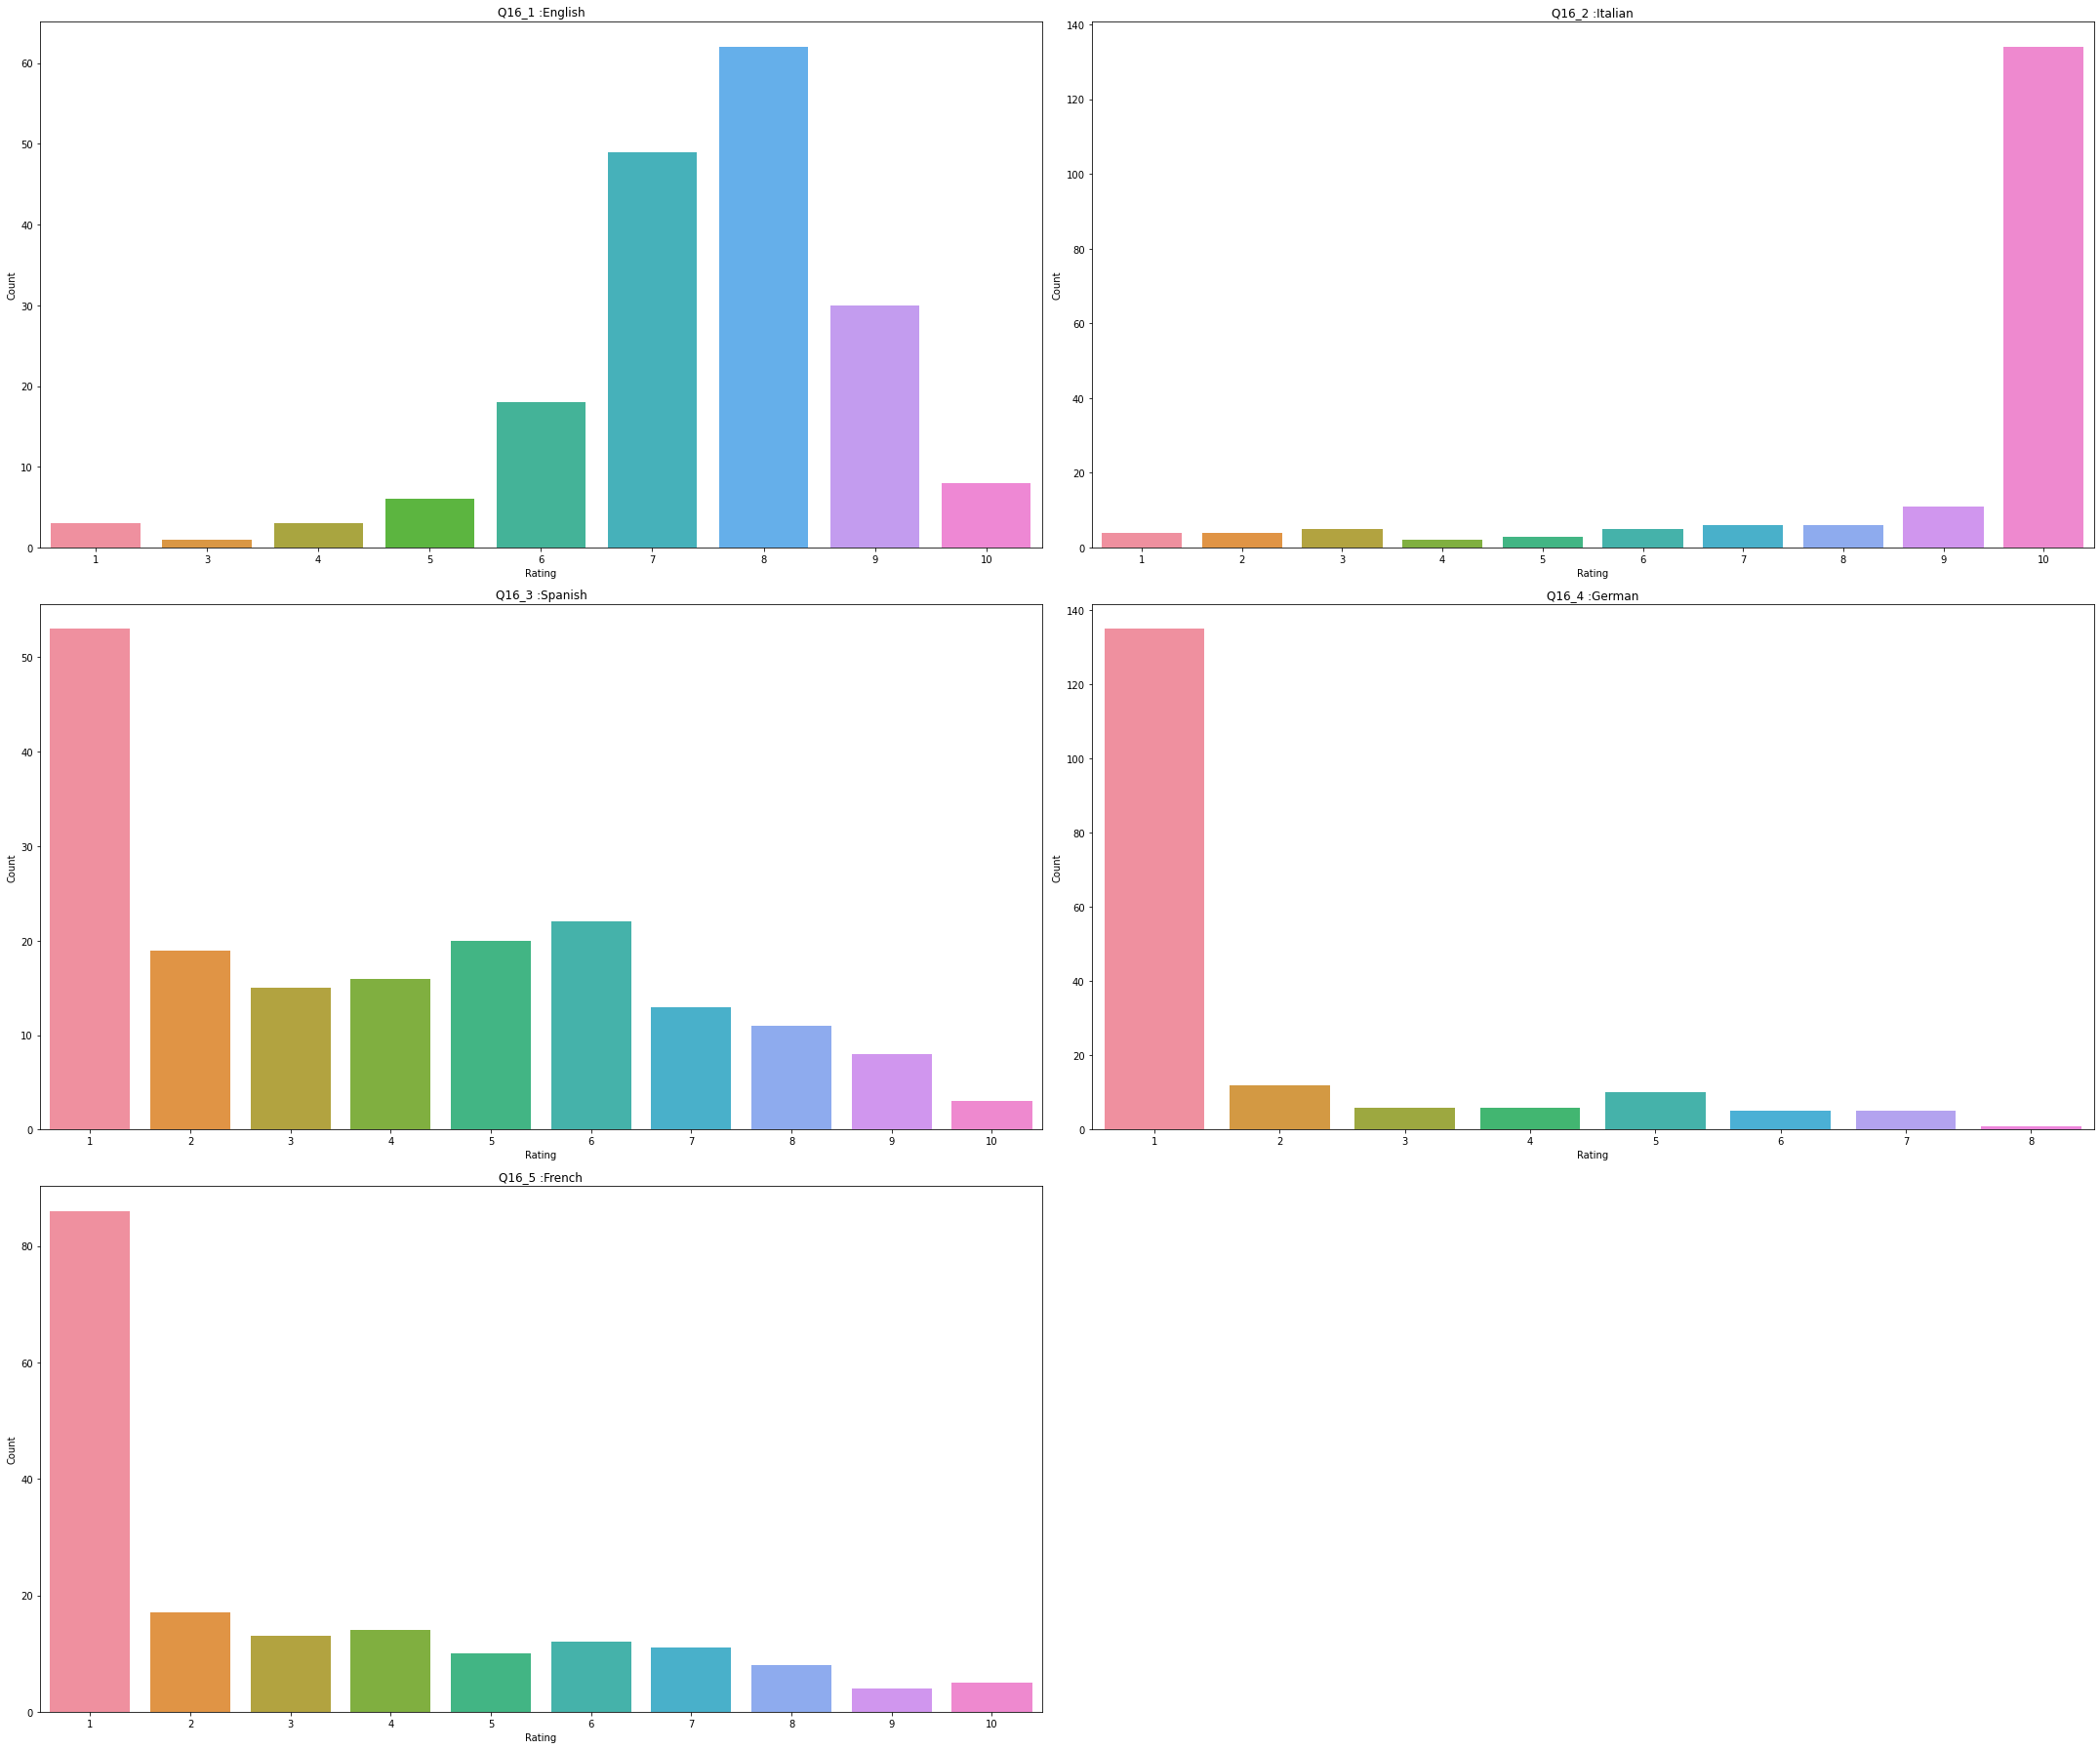

In [2781]:
plt.figure(figsize=(30, 25))
plt.subplot(3,2,1)
sns.countplot(x=df1['Q16_1'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q16_1 :English")


plt.subplot(3,2,2)
sns.countplot(x=df1['Q16_2'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q16_2 :Italian")


plt.subplot(3,2,3)
sns.countplot(x=df1['Q16_3'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q16_3 :Spanish")


plt.subplot(3,2,4)
sns.countplot(x=df1['Q16_4'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q16_4 :German")



plt.subplot(3,2,5)
sns.countplot(x=df1['Q16_5'],data=df1,saturation=0.85)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Q16_5 :French")



plt.tight_layout()
plt.show()

#### Insights 
- The analysis shows us that majority of the respondents are most knowledgable in Italian with an average rating of __8.9__ with a standard deviation of __2.2__ followed by English.

- The majority of the respondents are least knowledgable in __German__ followed by __French & Spanish__

### 4.5  Categorical Features :Bivariate Analysis

- To analyse and test for association between categorical features
- To perform bivariate analysis on important factors

In [2782]:
def anov(x,y):
    
    #A function to calculate ANOVA
    
    model = ols('x ~ y',data = df1).fit() # Model Formula
                
    anova_result = sm.stats.anova_lm(model, typ=2)
    return print(anova_result)

In [2783]:
def kaisq(x,y):
    
    # A function to calculate Chi-Square
    
    scipy.stats.chisquare(x.value_counts())
    scipy.stats.chisquare(y.value_counts())
    cont = pd.crosstab(x,y)

    dof=[]

    (chi,p,dof,_)=scipy.stats.chi2_contingency(cont)
    
    # effect size data frame for cramer's v function
    data = np.array([[1, .1, .3, .5],
       [2, .07, .21, .35],
       [3, .06, .17, .29],
       [4, .05,.15,.25],
       [5, .04, .13, .22]])
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect'])
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cont)[0]    # calculating the total number of observations
    n = cont.sum().sum()    # getting the degrees of freedom
    dof = min(cont.shape)-1    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))    # printing results
    
    x_return= pprint.pprint({"Chi-Square":chi,
              "P-Value " : p,
              "Degrees of Freedom":dof,
                    "Kramers V":v,
                     "Effect Size Threshold":sizes}
                   )
    
    return x_return

### 4.5.1 Bivariate Analysis - Q23 vs Q21 : Average Spend per month Vs University
- To check if Average spend per month and the universities they go to are dependent on each other or not

- In Q21 , respondents identified which universities they went to and these were the choices : __1.Universita Commerciale Luigi Bocconi , 2.Politecnico Di Milano , 3.IULM__

-  In Q23 , respondents identified with their spending categories and these were the choices : __11= >250€, 2= 250€ -500€ , 3= 500€ - 750€ , 4= 750€ - 900€ , 5= >900€__

In [2784]:
kaisq(df1["Q23"],df1["Q21"])

{'Chi-Square': 36.76624409730579,
 'Degrees of Freedom': 2,
 'Effect Size Threshold':    Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22,
 'Kramers V': 0.31957543057289217,
 'P-Value ': 1.2705853616863136e-05}


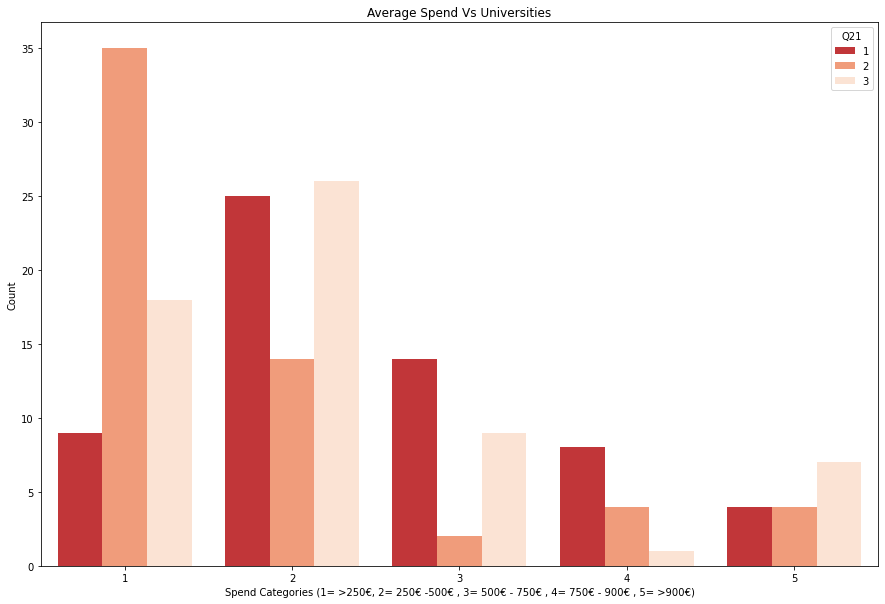

In [2785]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q23'],data=df1,hue="Q21",saturation=1.85)
plt.xlabel("Spend Categories (1= >250€, 2= 250€ -500€ , 3= 500€ - 750€ , 4= 750€ - 900€ , 5= >900€)")
plt.ylabel("Count")
plt.title("Average Spend Vs Universities")
plt.show()

#### Insights 
- The Chi Square Analysis shows us that there is a dependence between these two categorical variables and we know it's significant as the __p-value<0.05__ and with a Kramer's V of __0.319__ which has a __large effect__ on each other.

- We can see that most of the respondents from the Politecnico Di Milano University remain significant in only the first 2 spending categories.

- Meanwhile Bocconi has significant respondents in the 2,3 & 4 spending categories.

### 4.5.2 Bivariate Analysis - Q20 vs Q21 : Origin Vs University
- To check if Origin of the respondents and the universities they go to are dependent on each other or not.

- In Q21 , respondents identified which universities they went to and these were the choices : __1.Universita Commerciale Luigi Bocconi , 2.Politecnico Di Milano , 3.IULM__

- In Q20, respondents responded to where their origin was and the choices were as such :  __1= Italy, 2=Europe , 3=Asia , 4=North America , 5=South America , 6=Africa , 7=Oceania__

In [2786]:
kaisq(df1["Q20"],df1["Q21"])

{'Chi-Square': 32.92231721113007,
 'Degrees of Freedom': 2,
 'Effect Size Threshold':    Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22,
 'Kramers V': 0.3024084673781936,
 'P-Value ': 0.0009954060231255847}


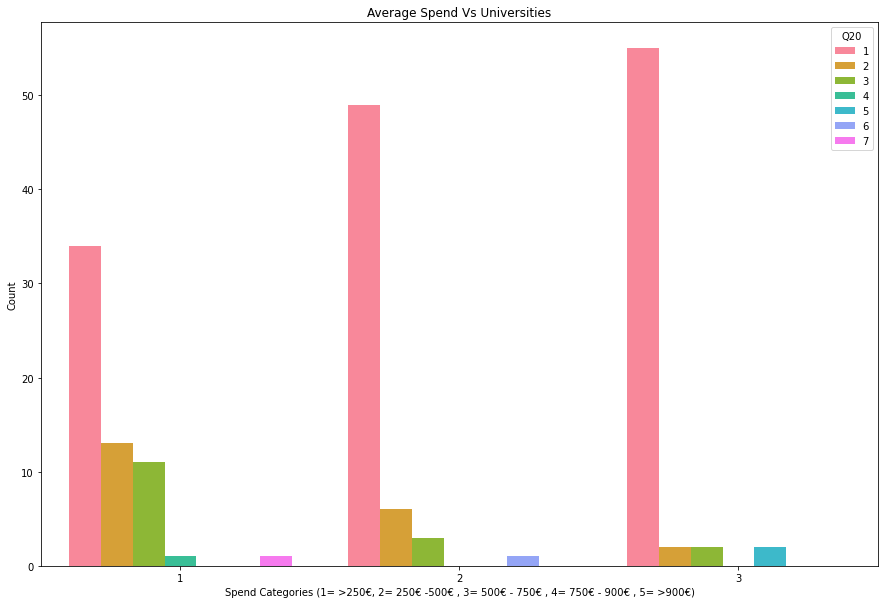

In [2787]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df1['Q21'],data=df1,hue="Q20",saturation=1.85)
plt.xlabel("Spend Categories (1= >250€, 2= 250€ -500€ , 3= 500€ - 750€ , 4= 750€ - 900€ , 5= >900€)")
plt.ylabel("Count")
plt.title("Average Spend Vs Universities")
plt.show()

#### Insights 
- The Chi Square Analysis shows us that there is a dependence between these two categorical variables and we know it's significant as the __p-value<0.05__ and with a Kramer's V of __0.302__ which has a __large effect__ on each other.

- We can see that __Bocconi__ has the most international mix of from our sample data.

- Meanwhile the __IULM respondents__ have been __mostly Italians__ with very few international students.

### [5 Feature Reduction/Selection](#5-Feature-Reduction/Selection)

- To reduce the dimension of the input information (Pricipal Factor Analysis)

### 5.1 Correlation Analysis
- To check for correlation in the quantitative data

In [2790]:
df_tran=df_quant.drop(columns=["Q16_3","Q16_4","Q16_5"],inplace=True)
#df_tran.drop(columns=["Q16_1","Q16_2"])
df_tran=df_quant
df_tran.shape

(180, 20)

<AxesSubplot:>

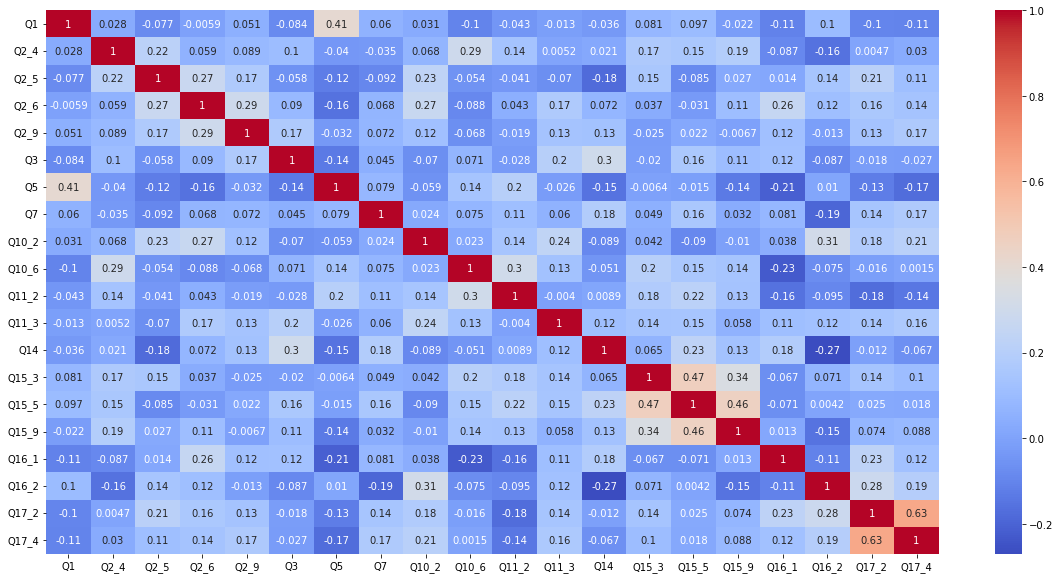

In [2791]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_tran.corr(),cmap='coolwarm',annot=True)

### 5.2 Latent Variable Check
- To fit a factor model with number of components equal to the number of the variables in our dataframe

In [2792]:
fa_pca = FactorAnalyzer(rotation=None, n_factors=20, method='principal')
fa_pca.fit(df_tran)

FactorAnalyzer(method='principal', n_factors=20, rotation=None,
               rotation_kwargs={})

In [2793]:
ev, _ = fa_pca.get_eigenvalues()
display(ev)

array([2.62939728, 2.38015184, 1.9443221 , 1.46150176, 1.40536517,
       1.23040679, 1.1738164 , 1.0433076 , 0.81315838, 0.7415903 ,
       0.71429481, 0.68562584, 0.65875024, 0.58565308, 0.55637936,
       0.50224122, 0.46854714, 0.37709021, 0.33960321, 0.28879728])

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

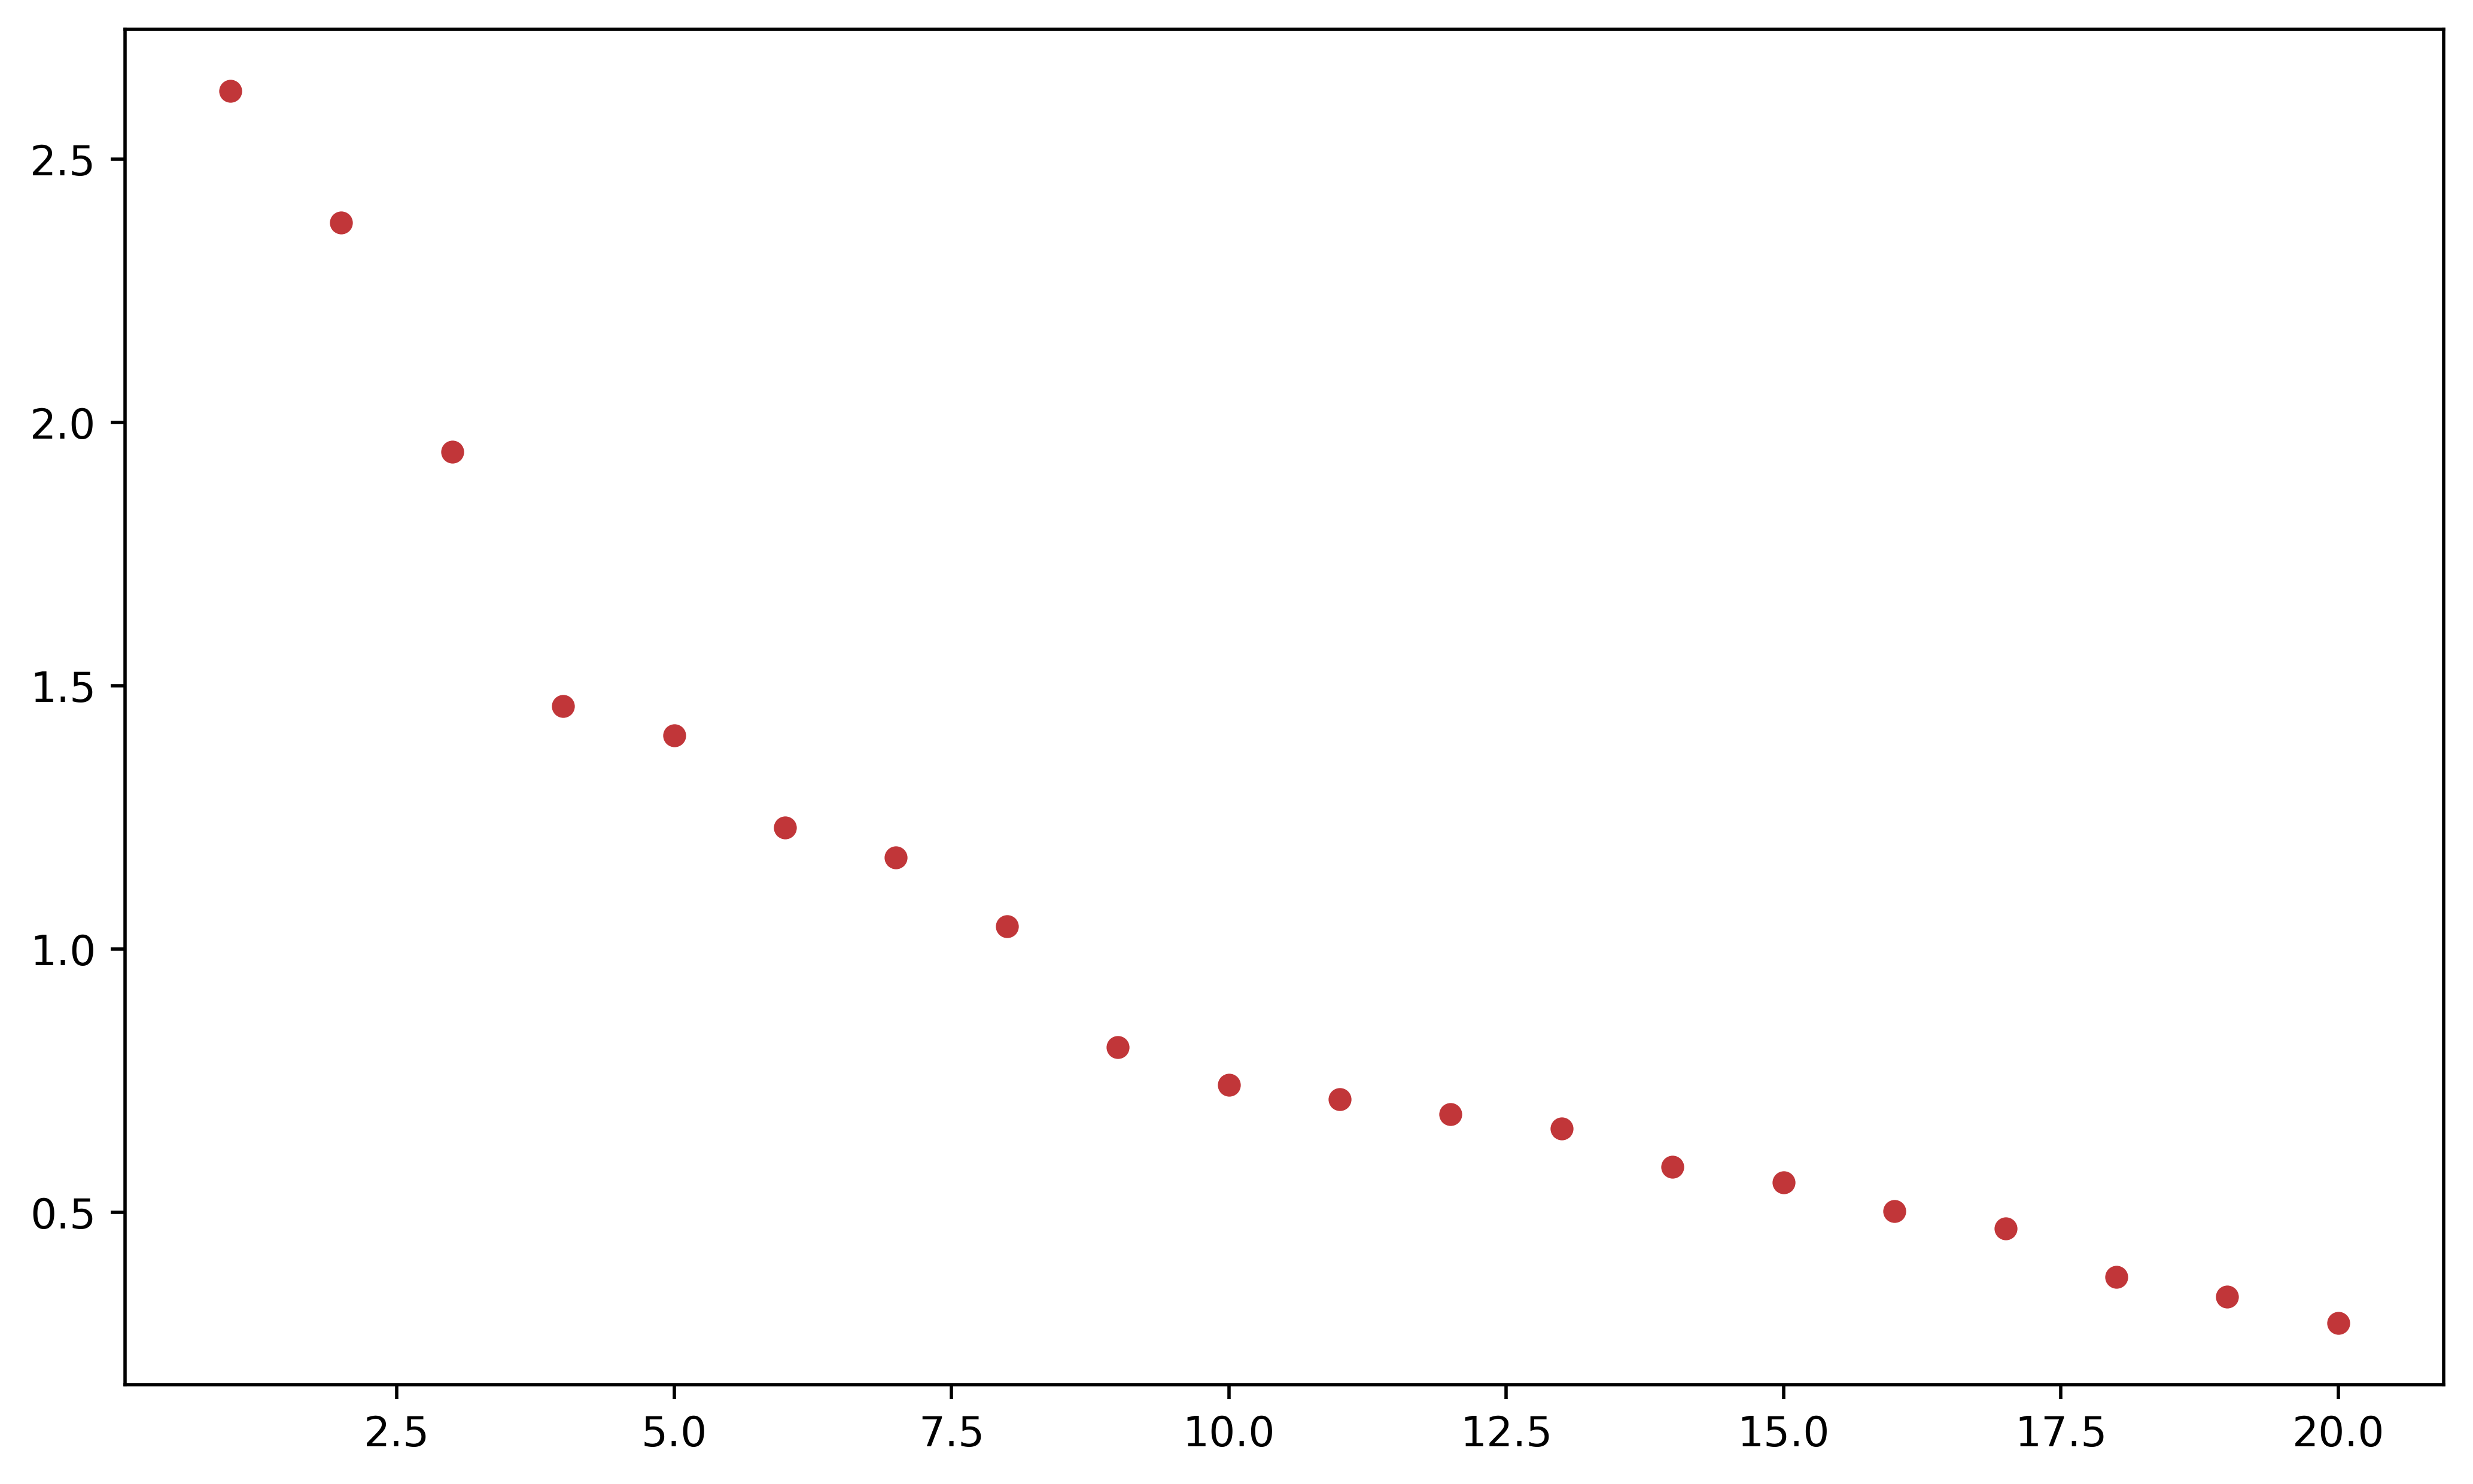

In [2794]:
ev, _ = fa_pca.get_eigenvalues()
plt.rcParams['figure.dpi'] = 500
plt.figure(figsize=(10,6))
sns.scatterplot(x=range(1,df_tran.shape[1]+1),y=ev)
ax = sns.lineplot(x=range(1,df_tran.shape[1]+1), y=ev)
ax.set(xlabel="Factor", ylabel = "Eigenvalue")

In [2795]:
variance_summary_data = {
    'Variance':fa_pca.get_factor_variance()[0],
    'Proportion Var':fa_pca.get_factor_variance()[1],
    'Cumulative Var': fa_pca.get_factor_variance()[2]
}
variance_summary = pd.DataFrame(data=variance_summary_data)
variance_summary

,Variance,Proportion Var,Cumulative Var
0,2.629397,0.131470,0.131470
1,2.380152,0.119008,0.250477
2,1.944322,0.097216,0.347694
3,1.461502,0.073075,0.420769
4,1.405365,0.070268,0.491037
5,1.230407,0.061520,0.552557
6,1.173816,0.058691,0.611248
7,1.043308,0.052165,0.663413
8,0.813158,0.040658,0.704071
9,0.741590,0.037080,0.741151


### Insights

- After considering the scree plot, Eigen Values and the Cumulative Variance, we have concluded that the optimum number of factors to be considered are 8.


### 5.3 PCA with and without rotation
- To use Varimax or Promax rotation and to compare unrotated factor loadings and rotated factor loadings for the analysis. 

In [2796]:
n_factors = 8
##The object with the result of the PCA without rotation
fa_no_rotation = FactorAnalyzer(n_factors, rotation=None, method='principal')
fa_no_rotation.fit(df_tran)

FactorAnalyzer(method='principal', n_factors=8, rotation=None,
               rotation_kwargs={})

In [2797]:
ev, _ = fa_no_rotation.get_eigenvalues()
df_eigenvals = pd.DataFrame({"Eigenvalues":ev}).iloc[:8]

variance_data = {
    'Variance':fa_no_rotation.get_factor_variance()[0],
    'Proportion Var':fa_no_rotation.get_factor_variance()[1],
    'Cumulative Var': fa_no_rotation.get_factor_variance()[2]
}
df_variance = pd.DataFrame(data=variance_data)

df_tot=df_eigenvals.join(df_variance)
df_tot

,Eigenvalues,Variance,Proportion Var,Cumulative Var
0,2.629397,2.629397,0.131470,0.131470
1,2.380152,2.380152,0.119008,0.250477
2,1.944322,1.944322,0.097216,0.347694
3,1.461502,1.461502,0.073075,0.420769
4,1.405365,1.405365,0.070268,0.491037
5,1.230407,1.230407,0.061520,0.552557
6,1.173816,1.173816,0.058691,0.611248
7,1.043308,1.043303,0.052165,0.663413


In [2798]:
display(fa_no_rotation.loadings_.shape) 

display(np.round(100*fa_no_rotation.loadings_,0))

#Communalities
communalities = fa_no_rotation.get_communalities()
df_communalities = pd.DataFrame({"Communalities":communalities})
display(df_communalities)

(20, 8)

array([[-17.,   8.,  28.,  60.,  17.,  46.,  16.,  19.],
       [ 20.,  39.,  17., -38.,  30.,  -2.,  22.,  41.],
       [ 39., -20.,  30., -41.,  29.,  23.,  26.,   4.],
       [ 54., -12.,  -5.,   3.,  48.,  14.,   3., -28.],
       [ 40.,  -5., -14.,  18.,  47.,   7.,  17.,  29.],
       [ 22.,  25., -45.,   3.,  21.,  -3., -35.,  39.],
       [-38.,  14.,  40.,  53.,  16.,  -5.,  18.,  13.],
       [ 19.,  23., -16.,  45.,  -7., -36.,  47., -17.],
       [ 44., -18.,  38.,   8.,  33., -16., -20., -29.],
       [  2.,  51.,  31., -15.,   3., -53.,  -8.,  21.],
       [ -6.,  50.,  28.,  -1.,  29., -30.,   2., -44.],
       [ 42.,  12.,  -1.,  32.,   8., -20., -54.,   8.],
       [ 16.,  34., -61.,  19.,   6.,   6.,  -4.,  -4.],
       [ 34.,  52.,  31.,  -3., -24.,  30.,  -1., -11.],
       [ 25.,  69.,   3.,  12., -25.,  30., -10.,  -5.],
       [ 32.,  55.,  -3., -19., -19.,  29.,   5., -15.],
       [ 36., -22., -50.,   9.,   3.,   4.,  10., -24.],
       [ 25., -37.,  51.,  15.,

,Communalities
0,0.771492
1,0.666674
2,0.663537
3,0.635687
4,0.559802
5,0.635683
6,0.685242
7,0.693462
8,0.632478
9,0.707389


In [2799]:
unrotated_factor_pattern = pd.DataFrame(
    data=np.round(100*fa_no_rotation.loadings_,0), 
    index=df_tran.columns, 
    columns=["Factor_" + str(i+1) for i in range(n_factors)]
)
display(unrotated_factor_pattern)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
Q1,-17.0,8.0,28.0,60.0,17.0,46.0,16.0,19.0
Q2_4,20.0,39.0,17.0,-38.0,30.0,-2.0,22.0,41.0
Q2_5,39.0,-20.0,30.0,-41.0,29.0,23.0,26.0,4.0
Q2_6,54.0,-12.0,-5.0,3.0,48.0,14.0,3.0,-28.0
Q2_9,40.0,-5.0,-14.0,18.0,47.0,7.0,17.0,29.0
Q3,22.0,25.0,-45.0,3.0,21.0,-3.0,-35.0,39.0
Q5,-38.0,14.0,40.0,53.0,16.0,-5.0,18.0,13.0
Q7,19.0,23.0,-16.0,45.0,-7.0,-36.0,47.0,-17.0
Q10_2,44.0,-18.0,38.0,8.0,33.0,-16.0,-20.0,-29.0
Q10_6,2.0,51.0,31.0,-15.0,3.0,-53.0,-8.0,21.0


In [2803]:
fa = FactorAnalyzer(n_factors=8, rotation="promax", method='principal')
fa.fit(df_tran)

FactorAnalyzer(method='principal', n_factors=8, rotation_kwargs={})

In [2804]:
rotated_factor_pattern_nofilter = pd.DataFrame(
    data=np.round(100*fa.loadings_,0), 
    index=df_tran.columns, 
    columns=["Factor_" + str(i+1) for i in range(n_factors)]
)
display(rotated_factor_pattern_nofilter)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
Q1,-11.0,19.0,-2.0,91.0,-7.0,-28.0,-3.0,6.0
Q2_4,4.0,11.0,1.0,-1.0,-11.0,51.0,18.0,73.0
Q2_5,8.0,6.0,-21.0,-7.0,25.0,-7.0,-26.0,69.0
Q2_6,-11.0,4.0,4.0,-2.0,62.0,-31.0,5.0,28.0
Q2_9,9.0,-16.0,13.0,27.0,16.0,-7.0,36.0,47.0
Q3,-10.0,-3.0,-13.0,-9.0,-9.0,16.0,85.0,10.0
Q5,-8.0,-12.0,22.0,72.0,-1.0,21.0,-13.0,-5.0
Q7,38.0,-1.0,88.0,19.0,2.0,7.0,-16.0,-16.0
Q10_2,2.0,-9.0,-12.0,-5.0,78.0,9.0,-4.0,6.0
Q10_6,13.0,-1.0,14.0,-15.0,4.0,92.0,20.0,14.0


In [2805]:
rotated_factor_pattern=rotated_factor_pattern_nofilter.copy()

rotated_factor_pattern[abs(rotated_factor_pattern) < 35] = ""
rotated_factor_pattern.sort_values(by=list(rotated_factor_pattern.columns), ascending=True, inplace=True)
display(rotated_factor_pattern)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
Q11_2,-35.0,,,,50.0,43.0,,
Q7,38.0,,88.0,,,,,
Q17_2,90.0,,,,,,,
Q17_4,92.0,,,,,,,
Q15_9,,74.0,,,,,,
Q15_3,,78.0,,,,,,
Q15_5,,81.0,,,,,,
Q16_2,,,-63.0,,35.0,,,
Q5,,,,72.0,,,,
Q1,,,,91.0,,,,


In [2806]:
rotated_factor_pattern_nofilter.abs().idxmax(axis="columns",skipna=True).sort_values()

Q17_4    Factor_1
Q17_2    Factor_1
Q15_9    Factor_2
Q15_5    Factor_2
Q15_3    Factor_2
Q16_2    Factor_3
Q7       Factor_3
Q1       Factor_4
Q5       Factor_4
Q10_2    Factor_5
Q11_2    Factor_5
Q2_6     Factor_5
Q16_1    Factor_6
Q10_6    Factor_6
Q3       Factor_7
Q11_3    Factor_7
Q14      Factor_7
Q2_9     Factor_8
Q2_5     Factor_8
Q2_4     Factor_8
dtype: object

### Insights
- We have used rotation and found promax to be the most optimal in seperating as it allows factors to be correlated.

In [2807]:
## Adding questions for labels

dict_labels = {
    "Q17_4": "How would you describe yourself? (Open-Minded)",
    "Q17_2": "How would you describe yourself? (Curious)",
    "Q15_9": "Which of the packages would you choose (9)",
    "Q15_5": "Which of the packages would you choose (5)",
    "Q15_3": "Which of the packages would you choose (3)",
    "Q16_2": "What is your approximate level of language knowledge? (English)",
    "Q7": "How many times did you watch films in their original language in a movie theatre? ",
    "Q1": "How many times did you go to the cinema in the past 3 months",
    "Q5": "How many times in the past year did you watch movies on the day it was released in a cinema?",  
    "Q10_2": "What can be your motivation to choose an original language movie over dubbed(Improve language knowledge)",
    "Q11_2": "What can prevent you from watching a movie in original language? (Lack of language knowledge)",  
    "Q2_6": "Rate the importance of factors (Timetable)",
    "Q16_1": "What is your approximate level of language knowledge? (Italian)",
    "Q10_6": "What can be your motivation to choose an original language movie over dubbed(Follow a trend)",
    "Q3": "How much do you usually spend on one ticket",
    "Q11_3": "What can prevent you from watching a movie in original language? (Hard to find cinemas offering original language)",
    "Q14": "How much would you be willing to spend for one ticket for an original language movie?",
    "Q2_9": "Rate the importance of factors (Choice of Film)",
    "Q2_5": "Rate the importance of factors (Price of Ticket)",
    "Q2_4":"Rate the importance of factors (Snack offer/Bar/VIP Service)"
    
}

df_labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=["label"])

In [2808]:
pd.options.display.max_colwidth=300
rotated_factor_pattern_labeled = (
    df_labels
    .join(rotated_factor_pattern)
    .sort_values(by=list(rotated_factor_pattern), ascending=True)
)
display(rotated_factor_pattern_labeled)

,label,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
Q11_2,What can prevent you from watching a movie in original language? (Lack of language knowledge),-35.0,,,,50.0,43.0,,
Q7,How many times did you watch films in their original language in a movie theatre?,38.0,,88.0,,,,,
Q17_2,How would you describe yourself? (Curious),90.0,,,,,,,
Q17_4,How would you describe yourself? (Open-Minded),92.0,,,,,,,
Q15_9,Which of the packages would you choose (9),,74.0,,,,,,
Q15_3,Which of the packages would you choose (3),,78.0,,,,,,
Q15_5,Which of the packages would you choose (5),,81.0,,,,,,
Q16_2,What is your approximate level of language knowledge? (English),,,-63.0,,35.0,,,
Q5,How many times in the past year did you watch movies on the day it was released in a cinema?,,,,72.0,,,,
Q1,How many times did you go to the cinema in the past 3 months,,,,91.0,,,,


In [2809]:
rotated_factor_pattern_nofilter.abs().idxmax(axis="columns",skipna=True).sort_values()

Q17_4    Factor_1
Q17_2    Factor_1
Q15_9    Factor_2
Q15_5    Factor_2
Q15_3    Factor_2
Q16_2    Factor_3
Q7       Factor_3
Q1       Factor_4
Q5       Factor_4
Q10_2    Factor_5
Q11_2    Factor_5
Q2_6     Factor_5
Q16_1    Factor_6
Q10_6    Factor_6
Q3       Factor_7
Q11_3    Factor_7
Q14      Factor_7
Q2_9     Factor_8
Q2_5     Factor_8
Q2_4     Factor_8
dtype: object

#### Assinging labels to the factors: ####

- FACTOR_1 (Q17_4, Q17_2): __Open Minded & Curious__
- FACTOR_2 (Q15_9,Q15_5,Q15_3): __Movie Packages__
- FACTOR_3 (Q16_2, Q7): __Original language watcher__
- FACTOR_4 (Q5,Q1): __Frequency of Cinema Visits__
- FACTOR_5 (Q2_6,Q10_2): __Language__
- FACTOR_6 (Q10_6, Q11_2,Q16_1): __Motivators & Demotivators__
- FACTOR_7 (Q11_3, Q3, Q14): __Willing to spend__
- FACTOR_8 (Q2_9,Q2_5,Q2_4): __Factors to choose a Cinema__

### Insights
- Identified the 8 factors.
- Categorized these 8 factors to the most relevant and according to the most contributing factor.

### [6 Data Preprocessing](#6-Data-Preprocessing)

- Using agglomerative clustering techniques to plot out a Dendogram
- To identify the optimum number of cluster & identifying centroids of these clusters so the KMeans is less randomized

In [2810]:
new_variables = fa.transform(df_tran)
transformed_df = pd.DataFrame(
    data = new_variables,
    columns=["Factor_" + str(i+1) for i in range(n_factors)])

In [2811]:
transformed_df.shape

(180, 8)

In [2812]:
display(df_tran.shape)
df_tran.head(100)

(180, 20)

,Q1,Q2_4,Q2_5,Q2_6,Q2_9,Q3,Q5,Q7,Q10_2,Q10_6,Q11_2,Q11_3,Q14,Q15_3,Q15_5,Q15_9,Q16_1,Q16_2,Q17_2,Q17_4
0,3,1,9,8,10,2.0,0,2,9,1,1,8,12,6,1,1,7,9,10,10
1,5,4,8,8,8,7.0,3,3,9,1,2,9,6,4,6,5,8,10,8,8
2,3,4,7,9,9,7.0,0,1,8,2,2,5,5,4,6,7,8,10,10,10
3,2,2,9,9,9,8.0,1,0,8,6,5,7,12,7,7,7,9,10,9,9
4,3,6,10,8,9,6.0,0,1,9,4,7,7,7,6,4,8,8,10,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,5,10,8,10,7.0,1,1,9,1,2,8,10,8,5,5,9,10,9,10
96,1,2,10,10,10,8.0,0,0,7,2,1,8,5,4,2,3,9,10,10,10
97,0,6,7,9,10,13.0,0,2,6,1,1,9,18,2,1,5,10,1,7,7
98,0,1,10,10,10,6.0,0,0,4,1,1,7,5,3,2,6,8,10,10,8


In [2813]:
transformed_df.head(300)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
0,1.551727,-1.805797,-0.315553,0.496973,0.393698,-1.217482,-0.605081,-0.301842
1,0.473609,-0.582008,-0.695791,1.494823,0.233290,-0.388253,-0.013680,-0.649676
2,1.247909,-0.219051,-0.546637,0.039879,-0.291568,-0.741989,-0.345325,0.091773
3,0.446363,0.799877,0.229244,-0.340589,0.536720,-0.258635,0.566842,-0.228774
4,-1.429232,0.251460,-0.224140,-0.226230,0.672394,0.229856,-0.705234,0.694844
...,...,...,...,...,...,...,...,...
175,0.523415,1.868135,0.184136,1.419975,0.191501,0.708825,0.575685,-0.043366
176,0.576712,-1.142813,-1.628141,-0.732289,-0.704105,-0.148668,-0.771981,-1.092408
177,0.803984,-1.123521,-0.087881,0.366848,-0.562186,-1.369013,0.787953,0.083464
178,0.324521,-1.190674,-0.127761,-0.579368,0.229299,-2.111347,-0.245809,0.916582


In [2814]:
Factor_means = []
Factor_stds = []

for i in range(6):
    Factor_means.append(np.mean(transformed_df.iloc[:,i]))
    Factor_stds.append(np.std(transformed_df.iloc[:,i]))

print(Factor_means)
print(Factor_stds)
print(np.round(Factor_means))
print(np.round(Factor_stds))

[2.4671622769447924e-16, -6.908054375445419e-17, -1.1842378929335003e-16, 1.4802973661668753e-16, 1.6776703483224587e-16, 9.86864910777917e-18]
[1.0000002833646326, 0.9999998661398616, 1.0000006578221083, 0.9999999382086349, 1.0000003400504673, 1.0000000848798363]
[ 0. -0. -0.  0.  0.  0.]
[1. 1. 1. 1. 1. 1.]


In [2815]:
transformed_df.isna().sum()

Factor_1    0
Factor_2    0
Factor_3    0
Factor_4    0
Factor_5    0
Factor_6    0
Factor_7    0
Factor_8    0
dtype: int64

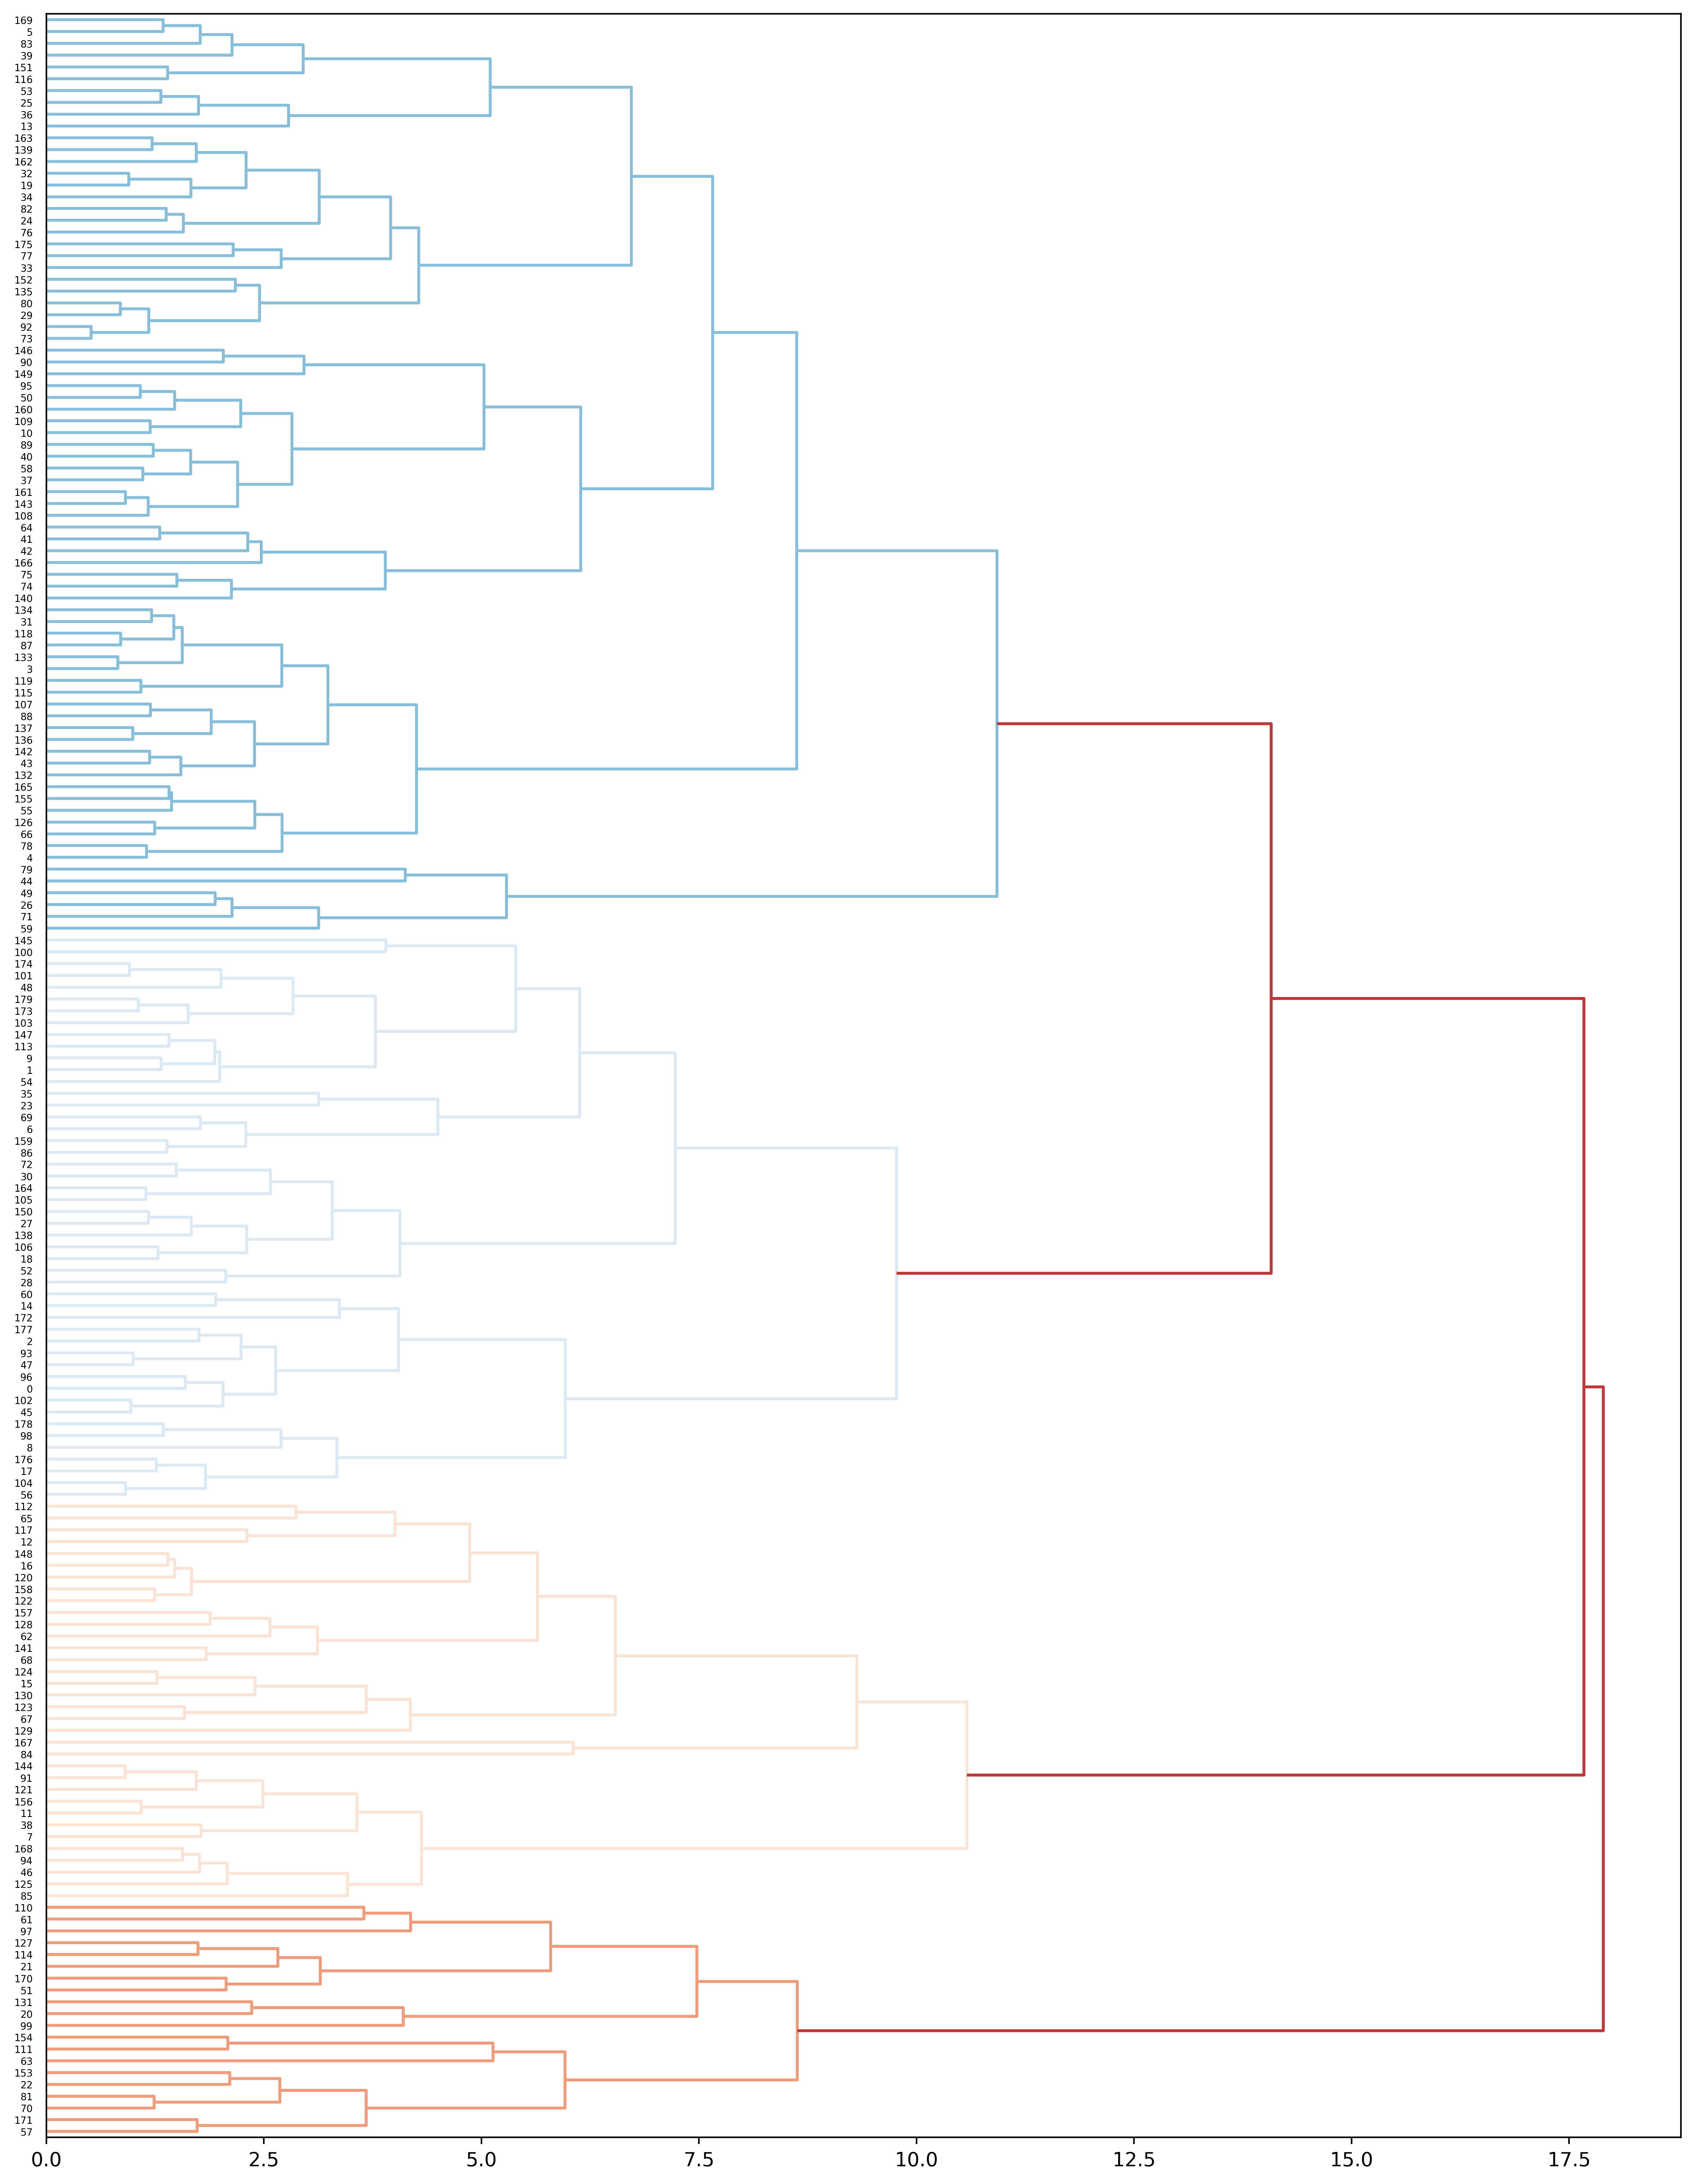

In [2816]:
t_df=transformed_df

plt.figure(figsize=(15,20))
np.random.seed(123) 
dendrogram = sch.dendrogram(
    sch.linkage(t_df, method='ward'),
    orientation='right',
    labels= t_df.index,
    distance_sort='ascending'
)


In [2817]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(transformed_df)
t_df["cluster_agg_ward"] = model.labels_
t_df["cluster_agg_ward"].value_counts(dropna=False)

cluster_agg_ward
0    78
1    48
2    34
3    20
Name: count, dtype: int64

In [2818]:
centroids = t_df.groupby("cluster_agg_ward").mean().to_numpy()
centroids

array([[ 0.26152339,  0.5635499 , -0.00706491, -0.06576832,  0.4619573 ,
        -0.09183118,  0.142566  ,  0.42304334],
       [ 0.6620822 , -0.73452897, -0.38170949,  0.20181709,  0.18309351,
        -0.24077604,  0.18847621, -0.66093641],
       [-0.88716788, -0.27673472, -0.37078005,  0.41914384, -0.68283798,
         0.85734882, -1.08838522, -0.40544195],
       [-1.10075308,  0.03547397,  1.57398201, -0.9404091 , -1.08023335,
        -0.52148889,  0.84190455,  0.62562966]])

## [7 Cluster Building](#7-Cluster-Building)


In [2819]:
transformed_df.drop(columns=["cluster_agg_ward"],inplace=True)
transformed_df.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
0,1.551727,-1.805797,-0.315553,0.496973,0.393698,-1.217482,-0.605081,-0.301842
1,0.473609,-0.582008,-0.695791,1.494823,0.233290,-0.388253,-0.013680,-0.649676
2,1.247909,-0.219051,-0.546637,0.039879,-0.291568,-0.741989,-0.345325,0.091773
3,0.446363,0.799877,0.229244,-0.340589,0.536720,-0.258635,0.566842,-0.228774
4,-1.429232,0.251460,-0.224140,-0.226230,0.672394,0.229856,-0.705234,0.694844


In [2820]:
km = KMeans(
    n_clusters=4, 
    init=centroids, ## we give the model the centroids we calculated above
    n_init=1,       # default 10 is overwritten with 1 when you pass initial centers explicitly
    random_state=1,
    max_iter=500,   ## Stop criterion 1: max number of iteration
    tol=0.0001      ## Stop criterion 2: limit in centroid changing 
).fit(transformed_df) ## Apply the model to the dataset with all the 203 observation 

## Have a look at centroids in final clusters
updated_centroids =km.cluster_centers_
updated_centroids

array([[ 0.20199222,  0.75241912, -0.04421669, -0.14407841,  0.56472884,
         0.05134604,  0.14471489,  0.30229852],
       [ 0.62108089, -0.85710562, -0.36244183,  0.26958869,  0.16852677,
        -0.46982003,  0.12538135, -0.16965785],
       [-0.76510438, -0.1133184 , -0.4599242 ,  0.409137  , -0.7919097 ,
         1.13117004, -0.989861  , -0.85400802],
       [-1.04165653, -0.01692225,  1.56688934, -0.74328349, -0.99394119,
        -0.51246777,  0.56995866,  0.62985375]])

In [2821]:
transformed_df['cluster_km'] = km.labels_
transformed_df['cluster_km'].value_counts(dropna=False, normalize=True)

cluster_km
0    0.383333
1    0.311111
2    0.172222
3    0.133333
Name: proportion, dtype: float64

### 7.1 Cluster Profiling


In [2822]:
def test_equality_of_means(df, var):

    df_cl_0 = df[df.cluster_km == 0][var]
    df_cl_1 = df[df.cluster_km == 1][var]
    df_cl_2 = df[df.cluster_km == 2][var]
    df_cl_3 = df[df.cluster_km == 3][var]

    fvalue, pvalue = stats.f_oneway( 
        df_cl_0, # cluster_0
        df_cl_1, # cluster_1
        df_cl_2, # cluster_2
        df_cl_3  # cluster_3
    )
    result_dict = {}
    result_dict["var"] = var
    result_dict["f_statistic"] = fvalue
    result_dict["p_value"] = pvalue
    return result_dict

In [2823]:
vars = [
    "Factor_1",
    "Factor_2",
    "Factor_3",
    "Factor_4",
    "Factor_5",
    "Factor_6",
    "Factor_7",
    "Factor_8"
]

for var in vars:
    print(test_equality_of_means(transformed_df, var))

{'var': 'Factor_1', 'f_statistic': 36.13097868874418, 'p_value': 3.0286585054490152e-18}
{'var': 'Factor_2', 'f_statistic': 47.578808817395085, 'p_value': 1.4394444497655924e-22}
{'var': 'Factor_3', 'f_statistic': 39.999146324647214, 'p_value': 9.242566762482283e-20}
{'var': 'Factor_4', 'f_statistic': 9.004294770829793, 'p_value': 1.4018770560283351e-05}
{'var': 'Factor_5', 'f_statistic': 34.5755846887508, 'p_value': 1.2815140790221603e-17}
{'var': 'Factor_6', 'f_statistic': 28.255286250367604, 'p_value': 5.78837197557542e-15}
{'var': 'Factor_7', 'f_statistic': 17.030299741719496, 'p_value': 9.339541315097376e-10}
{'var': 'Factor_8', 'f_statistic': 16.787728469478512, 'p_value': 1.232220375652653e-09}


### Insights
- Checking the statistical significance of each factor and since everything is below 0.05, we can conclude that every one of these factors are statistically significant

In [2730]:
clusters_summary = transformed_df.groupby("cluster_km").mean()
display(clusters_summary)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
cluster_km,,,,,,,,
0,-0.064004,-0.083693,-0.172138,-0.130701,0.329335,-0.324866,-0.148906,0.398869
1,-0.476499,0.316121,0.463417,-0.059358,0.043972,1.405137,-0.502552,-0.154768
2,1.130749,-0.059492,0.672021,0.062301,0.361168,-0.326222,0.602613,-1.460121
3,-0.225709,-0.006295,-0.504626,0.487168,-1.566887,-0.144189,0.581823,0.027834


In [2834]:
clusters_summary.to_csv('/Users/trotsqwerty/Desktop/Business Intelligence and Data Analytics/Exercise/clusters_summary_v1.csv')

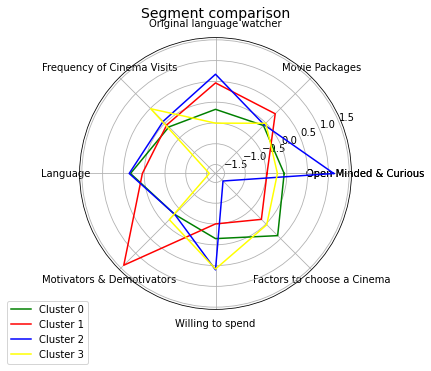

cluster_km
0    0.383333
1    0.311111
2    0.172222
3    0.133333
Name: proportion, dtype: float64

In [2921]:
categories = [
    'Open Minded & Curious', 
    'Movie Packages', 
    'Original language watcher', 
    'Frequency of Cinema Visits',
    'Language',
    'Motivators & Demotivators',
    'Willing to spend',
    'Factors to choose a Cinema'
]
#aggiungo l'ultimo valore uguale al primo per "chiudere il cerchio"
categories = [*categories, categories[0]]
cluster_0 = [*clusters_summary.iloc[0], clusters_summary.iloc[0,0]]
cluster_1 = [*clusters_summary.iloc[1], clusters_summary.iloc[1,0]]
cluster_2 = [*clusters_summary.iloc[2], clusters_summary.iloc[2,0]]
cluster_3 = [*clusters_summary.iloc[3], clusters_summary.iloc[3,0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=9)

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, cluster_0, label='Cluster 0',color='green')
plt.plot(label_loc, cluster_1, label='Cluster 1',color='red')
plt.plot(label_loc, cluster_2, label='Cluster 2',color='blue')
plt.plot(label_loc, cluster_3, label='Cluster 3',color='yellow')

plt.title('Segment comparison', size=14, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.05, 0.05))
plt.show()

transformed_df["cluster_km"].value_counts(normalize=True)

### 7.2 Testing for differences in other variables
- To check for statical differences, similarities in the clusters

In [2899]:
transformed_df_ = (transformed_df.join(df1[["Q22",'Q8','Q13','Gender', 'Q19', 'Q20', 'Q21', 'Q23','Q4','Q17_8','Q17_3']]))

In [2900]:
def chi_sq_test(contingeny_table):

    stat, p, dof, expected = stats.chi2_contingency(contingency_table)

    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [2883]:
#Gender

contingency_table = pd.crosstab(transformed_df_.Gender, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Independent (fail to reject H0)
Independent (fail to reject H0)


cluster_km,0,1,2,3
Gender,,,,
Female,41,23,16,14
Male,28,33,15,10


In [2882]:
#Age

contingency_table = pd.crosstab(transformed_df_.Q19, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Independent (fail to reject H0)
Independent (fail to reject H0)


cluster_km,0,1,2,3
Q19,,,,
18,2,1,0,0
19,10,6,1,3
20,14,8,2,4
21,20,16,6,2
22,8,12,8,4
23,5,7,3,7
24,6,2,5,1
25,3,1,4,1
26,0,1,1,1


In [2884]:
#Origin

contingency_table = pd.crosstab(transformed_df_.Q20, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Dependent (reject H0)
Dependent (reject H0)


cluster_km,0,1,2,3
Q20,,,,
1,57,52,23,6
2,7,3,1,10
3,4,0,5,7
4,0,0,0,1
5,1,0,1,0
6,0,1,0,0
7,0,0,1,0


In [2885]:
#Original Language movies in Milan

contingency_table = pd.crosstab(transformed_df_.Q8, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Independent (fail to reject H0)
Independent (fail to reject H0)


cluster_km,0,1,2,3
Q8,,,,
1,14,17,10,5
2,55,39,21,19


In [2887]:
#Universities ( 1= Bocconi, 2=Politecnico , 3=IULM)

contingency_table = pd.crosstab(transformed_df_.Q21, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Independent (fail to reject H0)
Independent (fail to reject H0)


cluster_km,0,1,2,3
Q21,,,,
1,25,14,7,14
2,20,21,12,6
3,24,21,12,4


In [2902]:
#Level of current study ( 1= Bachelors, 2=Master's )

contingency_table = pd.crosstab(transformed_df_.Q22, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Independent (fail to reject H0)
Independent (fail to reject H0)


cluster_km,0,1,2,3
Q22,,,,
1,54,38,18,13
2,15,18,13,11


In [2903]:
#Average Monthly Spend ( 1= <250, 2=250-500 , 3=500-750 , 4=750-900 ,5=>900)

contingency_table = pd.crosstab(transformed_df_.Q23, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Dependent (reject H0)
Dependent (reject H0)


cluster_km,0,1,2,3
Q23,,,,
1,27,24,8,3
2,21,20,18,6
3,9,7,2,7
4,6,1,1,5
5,6,4,2,3


In [2905]:
#Which version of Movie do you prefer ( 1= Movie in its original language, 2=Dubbed , 3=No Preference)

contingency_table = pd.crosstab(transformed_df_.Q4, transformed_df_.cluster_km)
chi_sq_test(contingency_table)
contingency_table

Dependent (reject H0)
Dependent (reject H0)


cluster_km,0,1,2,3
Q4,,,,
1,20,20,3,17
2,26,18,19,3
3,23,18,9,4


In [2908]:
def test_equality_of_means_v2(df, var):

    df_cl_0 = df[df.cluster_km == 0][var]
    df_cl_1 = df[df.cluster_km == 1][var]
    df_cl_2 = df[df.cluster_km == 2][var]
    df_cl_3 = df[df.cluster_km == 3][var]

    fvalue, pvalue = stats.f_oneway( 
        df_cl_0, # cluster_0
        df_cl_1, # cluster_1
        df_cl_2, # cluster_2
        df_cl_3  # cluster_3
    )
    
    result_dict = {}
    result_dict["var"] = var
    result_dict["f_statistic"] = fvalue
    result_dict["p_value"] = pvalue
    
    df_mean = (
        transformed_df_
        .groupby("cluster_km")[[var]]
        .mean()
        .reset_index()
        .set_index("cluster_km")
        .rename(columns = {var: "mean_" + var})
    )
        
    df_std = (
        transformed_df_
        .groupby("cluster_km")[[var]]
        .std()
        .reset_index()
        .set_index("cluster_km")
        .rename(columns = {var: "std_" + var})
    )
     
    print(df_mean.join(df_std))
        
    return result_dict

In [2927]:

vars = [
    "Q17_8", #Spontaneous
    "Q17_3",# Sociable
]

for var in vars:
    print(test_equality_of_means_v2(transformed_df_, var))

            mean_Q17_8  std_Q17_8
cluster_km                       
0             7.608696   1.816731
1             7.428571   2.139304
2             6.870968   2.012328
3             5.625000   2.567565
{'var': 'Q17_8', 'f_statistic': 6.034544697456292, 'p_value': 0.0006188612125704373}
            mean_Q17_3  std_Q17_3
cluster_km                       
0             8.028986   1.590144
1             7.732143   1.458406
2             6.322581   1.832796
3             6.791667   2.084710
{'var': 'Q17_3', 'f_statistic': 9.255992763561355, 'p_value': 1.0223819727275535e-05}


## [8 Cluster Description](#8-Cluster-Description)



- Cluster 1 : __Strictly Streep__  __(38.3% of the entire sample)__
    
    Like Meryl Streep in The Devil Wears Prada, this cluster consists of people who are extremely picky in terms of factors to choose while going for a movie. __Italians__  make up __82.6%__ of the entire cluster.
    
    They aren't willing to spend as much and most of the people in the cluster have an average monthly spend below 500 Euros. They describe themselves are highly sociable( averaging at __8.02__) and also highly spontaneous ( averaging at __7.6__).
    
   They are mostly young with atleast __64%__ lying in the __19-21__ year range.



- Cluster 2 :   __Package Peña__  __(31.1% of the entire sample)__

    Like Pedro Pascal in Narcos, this cluster hunts and finds the best cinema packages there is to offer.There are a lot of factors , motivators and demotivators that could lead this cluster to pick to watch a cinema or film, but a good deal would make them very happy.
   They rate themselves to be highly spontaneous at an average of __7.42__ . This cluster has the highest concentration of Italians who make up __92.8%__ of the entire cluster. The majority of this cluster spend below 500 Euros on average.




- Cluster 3 :  __Quite Quentin__     __(17.2% of the entire sample)__

    Like Quentin Tarantino, this cluster is made up of cinephiles who are excited to watch Original Language movies as this was the only cluster in which the people have gone to watch original language films in Milan (__48% of the cluster__) . 
    
   They are extremely open minded and curious which leads them to these experimentational film viewing experiences as they aren't afraid to put themselves out there. This cluster is also made up of mostly Italians who make up about __75%__ of the entire cluster.
    Majority of the cluster have a average monthly spend below 500 Euros ,yet this is a cluster that is willing to spend for movies.
    
   For the business problem, this cluster would be an ideal target.



- Cluster 4 : __Gorlami Frequent Flyers__ __(13.3% of the entire sample)__
    
    Like Brad Pitt in Inglorious Basterds, this cluster consists mostly of __Non-Italians__ who most frequently visit the cinemas out of any of the other clusters . They are also known to be willing to spend money for any kind of cinematic experience as they have no factors or features holding them back.
    
    They have average monthly spend of 500-750 Euros on average.This cluster self describes themselves as least spontaneous at __5.62__. They are most likely to go to familiar cinemas so that they know what they're getting.





